### An√°lisis de Conversi√≥n de Leads para la Escuela Online de Negocios
**By: Diego Araujo**
#### 1. Introducci√≥n
La Escuela Online de Negocios (EON) es una instituci√≥n educativa l√≠der en programas de negocios en l√≠nea, destacada por su enfoque innovador y pr√°ctico. Sin embargo, enfrenta un desaf√≠o importante: **una baja tasa de conversi√≥n de leads**, a pesar del alto inter√©s en sus cursos.  
Para abordar este problema, aplicaremos un **modelo de Regresi√≥n Log√≠stica** con el objetivo de mejorar la conversi√≥n de leads y optimizar las estrategias de marketing y ventas.

#### 2. Objetivos del Proyecto
Este an√°lisis tiene los siguientes objetivos clave:
- **Desarrollar un modelo de regresi√≥n log√≠stica** que permita evaluar la probabilidad de conversi√≥n de cada lead.
- **Asignar un puntaje de 0 a 100** a cada lead, reflejando su probabilidad de conversi√≥n.
- **Identificar 'Hot Leads'**, es decir, aquellos prospectos con alta probabilidad de conversi√≥n, para enfocar mejor los esfuerzos de marketing y ventas.

#### 3. Datos Utilizados
Para este an√°lisis, trabajaremos con diversas variables que describen el comportamiento e interacci√≥n de los leads.  
A continuaci√≥n, se presentan algunas variables clave del conjunto de datos:

- **Lead Origin**: Origen del lead (e.g., referencia, redes sociales, b√∫squeda org√°nica).
- **Lead Source**: Fuente espec√≠fica por la que lleg√≥ el lead (e.g., Google, Facebook, Email).
- **Do Not Email / Do Not Call**: Indicadores de si el lead ha solicitado no recibir emails o llamadas.
- **Total Visits**: N√∫mero total de visitas al sitio web.
- **Total Time Spent on Website**: Tiempo total que el lead ha pasado en la web.
- **Page Views Per Visit**: Promedio de p√°ginas vistas por visita.
- **Last Activity**: √öltima actividad realizada por el lead (e.g., apertura de correo, clic en enlace).
- **Specialization**: Especializaci√≥n acad√©mica de inter√©s del lead.
- **Current Occupation**: Ocupaci√≥n actual del lead (e.g., estudiante, profesional).
- **Tags**: Etiquetas asignadas al lead seg√∫n su comportamiento.
- **City**: Ciudad del lead.
- **Lead Profile**: Perfil categorizado del lead.
- **Variable Objetivo ("Converted")**: Indica si el lead se convirti√≥ en cliente (1) o no (0).

#### 4. Limpieza y Preparaci√≥n de Datos
Antes de construir nuestro modelo, es fundamental realizar una limpieza y preparaci√≥n adecuada de los datos:
- **Manejo de valores faltantes** en variables clave.
- **Transformaci√≥n de variables categ√≥ricas** en formatos num√©ricos.
- **Selecci√≥n de variables relevantes** para mejorar la capacidad predictiva del modelo.

#### 5. Creaci√≥n del Modelo de Regresi√≥n Log√≠stica
La regresi√≥n log√≠stica es un m√©todo estad√≠stico que nos permite modelar la probabilidad de un evento binario, en este caso, la conversi√≥n de un lead.  
Los pasos principales incluyen:
- **Divisi√≥n del conjunto de datos** en entrenamiento y prueba.
- **Construcci√≥n del modelo** ajustando los coeficientes para maximizar la precisi√≥n.
- **Evaluaci√≥n del modelo** mediante m√©tricas como la matriz de confusi√≥n, precisi√≥n, sensibilidad y la curva ROC.

#### 6. Evaluaci√≥n y Testing del Modelo
Para garantizar la calidad del modelo, utilizaremos:
- **Matriz de confusi√≥n** para analizar aciertos y errores en la clasificaci√≥n de leads.
- **Curva ROC y AUC** para evaluar la capacidad del modelo de distinguir entre leads convertidos y no convertidos.

#### 7. Implementaci√≥n del Lead Score
Una vez validado el modelo, lo aplicaremos para calcular un **Lead Score**, un puntaje entre 0 y 100 que refleje la probabilidad de conversi√≥n.  
Esto permitir√°:
- **Priorizar Hot Leads** y asignar recursos de manera estrat√©gica.
- **Optimizar campa√±as de marketing**, enfocando esfuerzos en los leads con mayor probabilidad de conversi√≥n.
- **Personalizar la comunicaci√≥n y promociones**, aumentando la efectividad del acercamiento.


In [377]:
# Librerias que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
#from google.colab import drive
#drive.mount('/content/drive')

### Preprocesamiento y Limpieza de Datos

Antes de construir nuestro modelo de Regresi√≥n Log√≠stica, es fundamental preparar los datos
para garantizar que la informaci√≥n sea precisa y √∫til. El preprocesamiento de datos nos
permite manejar inconsistencias y mejorar la calidad del dataset, optimizando as√≠ el
rendimiento del modelo.

En esta etapa, realizaremos las siguientes tareas clave:

1Ô∏è‚É£ **Manejo de valores faltantes** üõ†Ô∏è  
   Algunas variables contienen datos ausentes que pueden afectar la precisi√≥n del modelo.
   Aplicaremos estrategias como la imputaci√≥n de valores o eliminaci√≥n de registros
   seg√∫n la relevancia de la variable.

2Ô∏è‚É£ **Conversi√≥n de variables categ√≥ricas** üîÑ  
   Muchas columnas contienen datos en formato de texto (por ejemplo, "S√≠"/"No" o nombres de ciudades).  
   Para que la regresi√≥n log√≠stica pueda utilizarlas, transformaremos estas variables en valores
   num√©ricos mediante t√©cnicas como **one-hot encoding** o **label encoding**.

3Ô∏è‚É£ **Eliminaci√≥n de duplicados** üßπ  
   Si existen registros repetidos, los identificaremos y eliminaremos para evitar sesgos en el an√°lisis.

4Ô∏è‚É£ **Normalizaci√≥n y escalado** üìè  
   Algunas variables num√©ricas tienen rangos muy diferentes (por ejemplo, "Total Time Spent on Website"
   vs. "Page Views Per Visit"). Para mejorar la estabilidad del modelo, aplicaremos t√©cnicas de escalado
   como **Min-Max Scaling o Standardization**.

5Ô∏è‚É£ **Selecci√≥n de variables relevantes** üéØ  
   No todas las variables aportan valor al modelo. Realizaremos un an√°lisis exploratorio para identificar
   las m√°s importantes y descartaremos aquellas que no contribuyen significativamente a la predicci√≥n.



In [378]:
#Importamos nuestra data
ruta_csv = "/content/drive/MyDrive/Codigos Python colab/EON.csv"
df = pd.read_csv(ruta_csv)
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [379]:
# Podemos visualizar que tenemos 2 variables que podr√≠an funcionar como 'ID': Prospect ID y Lead Number. Botemos la m√°s compleja Prospect ID
df.drop(columns= 'Prospect ID', axis = 1, inplace = True)
df.set_index('Lead Number', inplace = True)
df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
Lead Number                                                                     
660737                           API      Olark Chat           No          No   
660728                           API  Organic Search           No          No   
660727       Landing Page Submission  Direct Traffic           No          No   
660719       Landing Page Submission  Direct Traffic           No          No   
660681       Landing Page Submission          Google           No          No   

             Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                        
660737               0          0.0                            0   
660728               0          5.0                          674   
660727               1          2.0                         1532   
660719               0          1.0                          305   
660681               1          2.0                         1428   

             Page Views Per Visit            Last Activity Country  ...  \
Lead Number                                                         ...   
660737                        0.0  Page Visited on Website     NaN  ...   
660728                        2.5             Email Opened   India  ...   
660727                        2.0             Email Opened   India  ...   
660719                        1.0              Unreachable   India  ...   
660681                        1.0        Converted to Lead   India  ...   

            Get updates on DM Content    Lead Profile    City  \
Lead Number                                                     
660737                             No          Select  Select   
660728                             No          Select  Select   
660727                             No  Potential Lead  Mumbai   
660719                             No          Select  Mumbai   
660681                             No          Select  Mumbai   

            Asymmetrique Activity Index Asymmetrique Profile Index  \
Lead Number                                                          
660737                        02.Medium                  02.Medium   
660728                        02.Medium                  02.Medium   
660727                        02.Medium                    01.High   
660719                        02.Medium                    01.High   
660681                        02.Medium                    01.High   

            Asymmetrique Activity Score Asymmetrique Profile Score  \
Lead Number                                                          
660737                             15.0                       15.0   
660728                             15.0                       15.0   
660727                             14.0                       20.0   
660719                             13.0                       17.0   
660681                             15.0                       18.0   

            I agree to pay the amount through cheque  \
Lead Number                                            
660737                                            No   
660728                                            No   
660727                                            No   
660719                                            No   
660681                                            No   

            A free copy of Mastering The Interview Last Notable Activity  
Lead Number                                                               
660737                                          No              Modified  
660728                                          No          Email Opened  
660727                                         Yes          Email Opened  
660719                                          No              Modified  
660681                                          No              Modified  

[5 rows x 35 columns]

In [380]:
# Ahora pasamos a examinar los datos para ver su tipo y si hay datos faltantes
# Notamos que hay 9240 registros, pero de las 35 variables, 17 tienen variables null
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        677

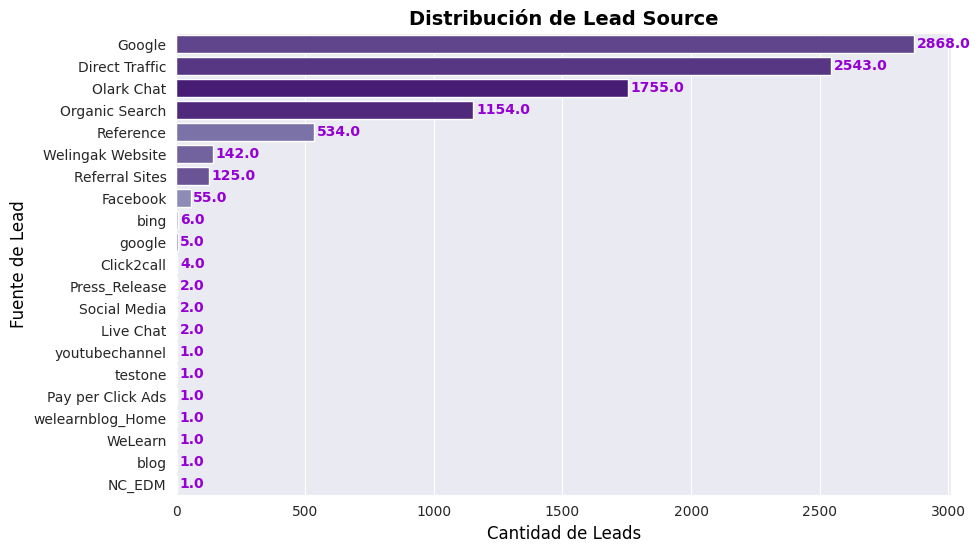

In [381]:
# Empezaremos haciendo un grafico de barras para Lead Source y ver donde estan las fuentes de tr√°fico
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.countplot(
    y='Lead Source',
    data=df,
    order=df['Lead Source'].value_counts().index,
    hue='Lead Source',
    palette="Purples_r",
    legend=False
)
plt.title("Distribuci√≥n de Lead Source", fontsize=14, fontweight='bold', color='black')
plt.xlabel("Cantidad de Leads", fontsize=12, color='black')
plt.ylabel("Fuente de Lead", fontsize=12, color='black')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 10, p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10, color='darkviolet', fontweight='bold')
plt.show()

üîç **Manejo de Valores Faltantes en 'Lead Source'**  

En el an√°lisis exploratorio, podr√≠amos haber encontrado una fuente de tr√°fico dominante, lo que justificar√≠a imputar los valores faltantes con la m√°s frecuente (moda). Esta estrategia se basa en la suposici√≥n de que un nuevo lead probablemente provenga de la fuente m√°s com√∫n.  

üìå **Sin embargo, en este caso no hay una fuente claramente dominante.**  
Para evitar sesgos en el modelo, en lugar de usar la moda, asignaremos el valor **"Desconocido"** a los datos faltantes. Esto nos permite mantener la informaci√≥n sin distorsionar la distribuci√≥n original de las fuentes de tr√°fico.  

In [382]:
df['Lead Source'] =df['Lead Source'].fillna('Desconocido')

üìå **Correcci√≥n de Tipo de Datos: 'Do Not Email', 'Do Not Call' y 'Converted'**  

Antes de continuar con el an√°lisis, es importante asegurarnos de que estas variables tengan el tipo de dato correcto:  

üîπ **Do Not Email**:  
   - Variable indicadora seleccionada por el cliente.  
   - Indica si un usuario ha optado por *no* recibir correos electr√≥nicos sobre el curso.  
   - Se convertir√° a un tipo **booleano (0 = S√≠ recibe, 1 = No recibe)** para facilitar su uso en el modelo.  

üîπ **Do Not Call**:  
   - Similar a 'Do Not Email', esta variable indica si un cliente ha optado por *no* recibir llamadas.  
   - Tambi√©n se transformar√° a **booleano (0 = S√≠ recibe, 1 = No recibe)**.  

üîπ **Converted** (*Variable Objetivo*):  
   - Indica si un lead ha sido convertido exitosamente en estudiante (1) o no (0).  
   - Ya est√° en formato num√©rico, por lo que no requiere transformaci√≥n.  

‚úÖ *Estas conversiones son esenciales para que el modelo interprete correctamente la informaci√≥n y pueda hacer predicciones precisas.*








In [383]:
# Convirtamos las variables a booleanos. Como haremos lo mismo con las tres, hagamos un lazo for
mapeo_binario = {'Yes': 1, 'No': 0}

for col in ['Do Not Email', 'Do Not Call', 'Converted']:
    df[col] = df[col].replace(mapeo_binario).astype(bool)



<ipython-input-383-ff4094352a4d>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapeo_binario).astype(bool)
<ipython-input-383-ff4094352a4d>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapeo_binario).astype(bool)


üìå **Manejo de Valores Nulos: 'TotalVisits' y 'Page Views Per Visit'**  

üîπ **TotalVisits**: N√∫mero total de visitas realizadas por el cliente en el sitio web.  
üîπ **Page Views Per Visit**: Cantidad de p√°ginas vistas por el cliente durante sus visitas.  

üîç *Antes de imputar los valores nulos, evaluaremos la distribuci√≥n de estas variables para seleccionar el mejor m√©todo.*  

In [384]:
# Examinamos la distribuci√≥n de Total Visits
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

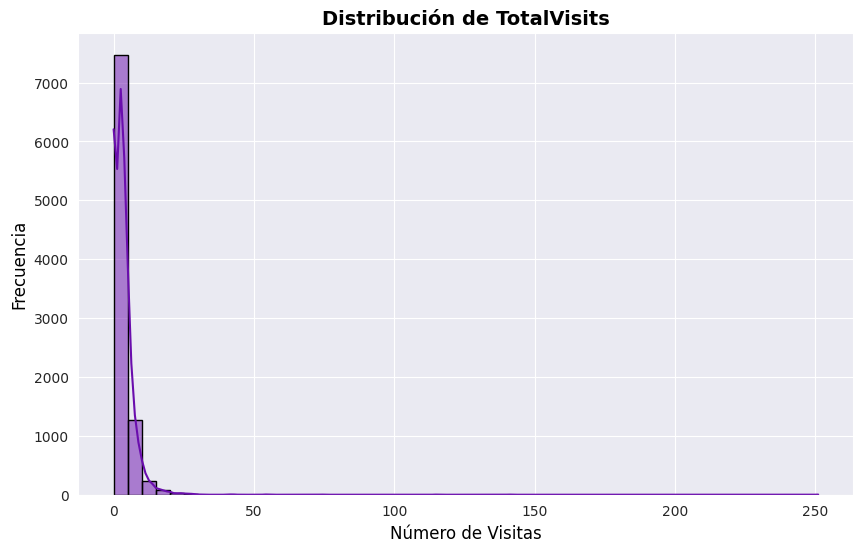

In [385]:
# Ahora realizaremos un Histograma de la  Distribucion
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(x='TotalVisits', data=df, bins=50, kde=True, color="#6a0dad", edgecolor="black")
plt.title("Distribuci√≥n de TotalVisits", fontsize=14, fontweight="bold", color="black")
plt.xlabel("N√∫mero de Visitas", fontsize=12, color="black")
plt.ylabel("Frecuencia", fontsize=12, color="black")
plt.show()

üìä Interpretaci√≥n de la distribuci√≥n de TotalVisits:
- La distribuci√≥n es altamente sesgada a la derecha, indicando que la mayor√≠a de los usuarios realizan pocas visitas al sitio web.
- Existen algunos valores extremos (outliers) con un n√∫mero elevado de visitas, pero representan una minor√≠a.
- Esto sugiere que la mayor√≠a de los leads interact√∫an poco con la plataforma antes de decidirse, lo que puede influir en la estrategia de conversi√≥n.
"""

In [386]:
# Examinemos la distribuci√≥n de 'Page Views Per Visit'
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

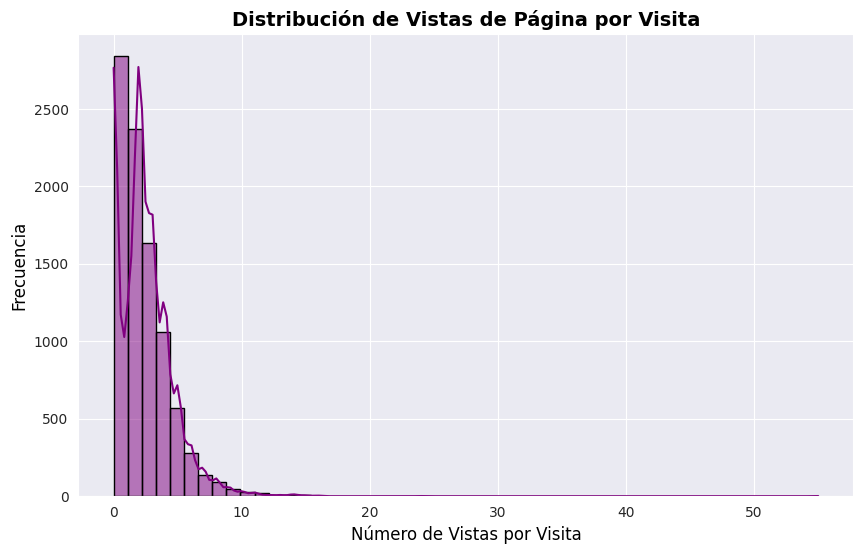

In [387]:
# Realizamos otro histograma de la distribuci√≥n
# Configuraci√≥n del estilo
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.histplot(x='Page Views Per Visit', data=df, bins=50,kde=True, color='purple', edgecolor='black')
ax.set_title("Distribuci√≥n de Vistas de P√°gina por Visita", fontsize=14, color='black', fontweight='bold')
ax.set_xlabel("N√∫mero de Vistas por Visita", fontsize=12, color='black')
ax.set_ylabel("Frecuencia", fontsize=12, color='black')
plt.show()

üìå Concepto clave: Imputaci√≥n de valores faltantes seg√∫n la distribuci√≥n de los datos

Cuando una variable tiene una distribuci√≥n severamente sesgada, la mejor estrategia para
imputar valores faltantes es usar la mediana.

‚úÖ ¬øPor qu√©?
- La mediana no se ve afectada por valores at√≠picos o extremos, lo que la hace m√°s robusta  
  para datos con sesgo.
- Proporciona una mejor estimaci√≥n del "centro" cuando la distribuci√≥n est√° sesgada.

üìä ¬øQu√© pasa si la distribuci√≥n es normal (sim√©trica)?
- En ese caso, podr√≠amos usar la media en lugar de la mediana.
- La media es una buena medida de tendencia central cuando los datos no est√°n sesgados,  
  ya que en una distribuci√≥n normal, la media y la mediana son pr√°cticamente iguales.

üîç Resumen
- Distribuci√≥n sesgada ‚Üí Usar mediana üèÜ
- Distribuci√≥n normal ‚Üí Usar media ‚úÖ

In [388]:
# Imputamos la mediana para los valores faltantes de TotalVisits
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())
# Imputamos la mediana para los valores faltantes de 'Page Views Per Visit'
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        677

üìå Manejo de Valores Nulos: √öltima Actividad (Last Activity)

üîπ Descripci√≥n:
La variable 'Last Activity' representa la √∫ltima acci√≥n realizada por el cliente en la plataforma.
Esto puede incluir:
- Apertura de un correo electr√≥nico üìß
- Interacci√≥n en el chat de Olark üí¨
- Clic en un enlace üîó
- Entre otras actividades.

üîç Estrategia para manejar valores nulos:
Para imputar los valores faltantes de esta variable, es fundamental analizar su distribuci√≥n.
Si existe una actividad claramente predominante, podr√≠amos reemplazar los valores nulos con la
categor√≠a m√°s frecuente (moda).

Sin embargo, si la distribuci√≥n es variada, podr√≠amos agrupar ciertas categor√≠as similares o
asignar un valor como "Desconocido" para evitar sesgos en el an√°lisis.

üéØ Objetivo:
Asegurar que los valores faltantes se manejen adecuadamente sin distorsionar la informaci√≥n
relevante para la segmentaci√≥n y modelado.

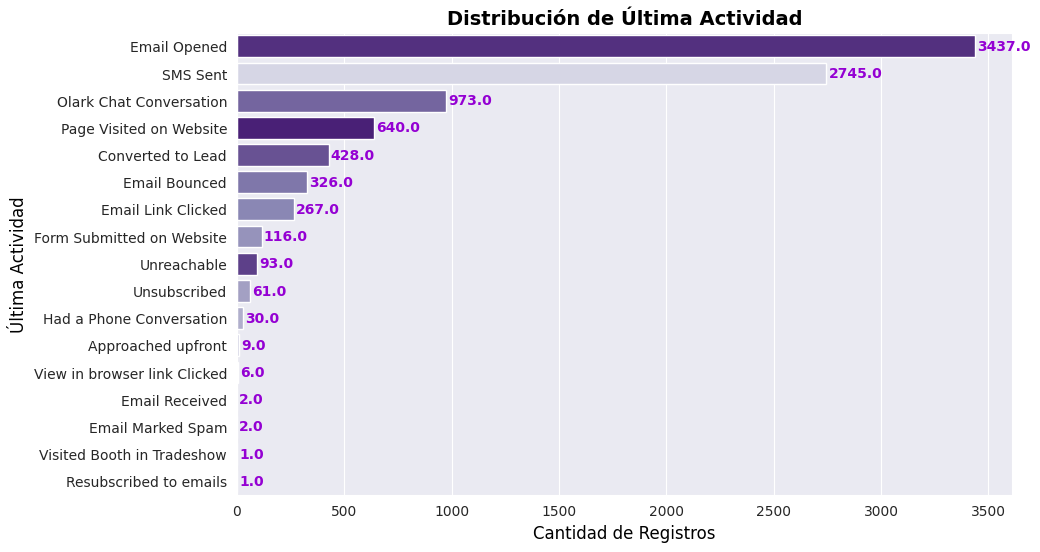

In [389]:
# Gr√°fico de Distribuci√≥n de Last Activity
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.countplot(
    y='Last Activity',
    data=df,
    order=df['Last Activity'].value_counts().index,
    hue='Last Activity',
    palette="Purples_r",
    legend=False
)
plt.title("Distribuci√≥n de √öltima Actividad", fontsize=14, fontweight='bold', color='black')
plt.xlabel("Cantidad de Registros", fontsize=12, color='black')
plt.ylabel("√öltima Actividad", fontsize=12, color='black')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 10, p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10, color='darkviolet', fontweight='bold')
plt.show()

üìå **Preprocesamiento de Datos: Una Clave en Ciencia de Datos**

El preprocesamiento de datos es una etapa crucial en cualquier proyecto de ciencia de datos. No solo implica limpiar los datos, sino que tambi√©n brinda la oportunidad de comprender su estructura, patrones y posibles problemas.

üéØ **¬øPor qu√© visualizar los datos?**  
La visualizaci√≥n nos permite detectar tendencias, valores at√≠picos y distribuciones que de otra manera pasar√≠an desapercibidos. Un gr√°fico de la distribuci√≥n de '√öltima Actividad' puede revelar patrones de comportamiento, preferencias y la efectividad de los canales de comunicaci√≥n utilizados.

üìä **Interpretaci√≥n de la Distribuci√≥n de '√öltima Actividad'**  
Si ninguna actividad espec√≠fica domina sobre las dem√°s (por ejemplo, con una frecuencia superior al 80-95%), significa que los clientes interact√∫an de diversas formas y no hay una tendencia √∫nica clara.

üîç **Manejo de Valores Nulos en '√öltima Actividad'**  
Dado que no existe una actividad predominante, una estrategia efectiva es asignar el valor "Desconocido" a los registros faltantes. Esto evita introducir un sesgo y conserva la integridad de los datos, registrando la ausencia de informaci√≥n en lugar de hacer suposiciones err√≥neas.

üì¢ **Conclusi√≥n**  
Este enfoque no solo es √∫til para gestionar datos faltantes, sino que tambi√©n ayuda a reconocer las limitaciones de nuestros datos. Puede motivar investigaciones futuras para mejorar la recopilaci√≥n de informaci√≥n y optimizar la toma de decisiones basadas en datos.

In [390]:
df['Last Activity'] = df['Last Activity'].fillna('Desconocido')

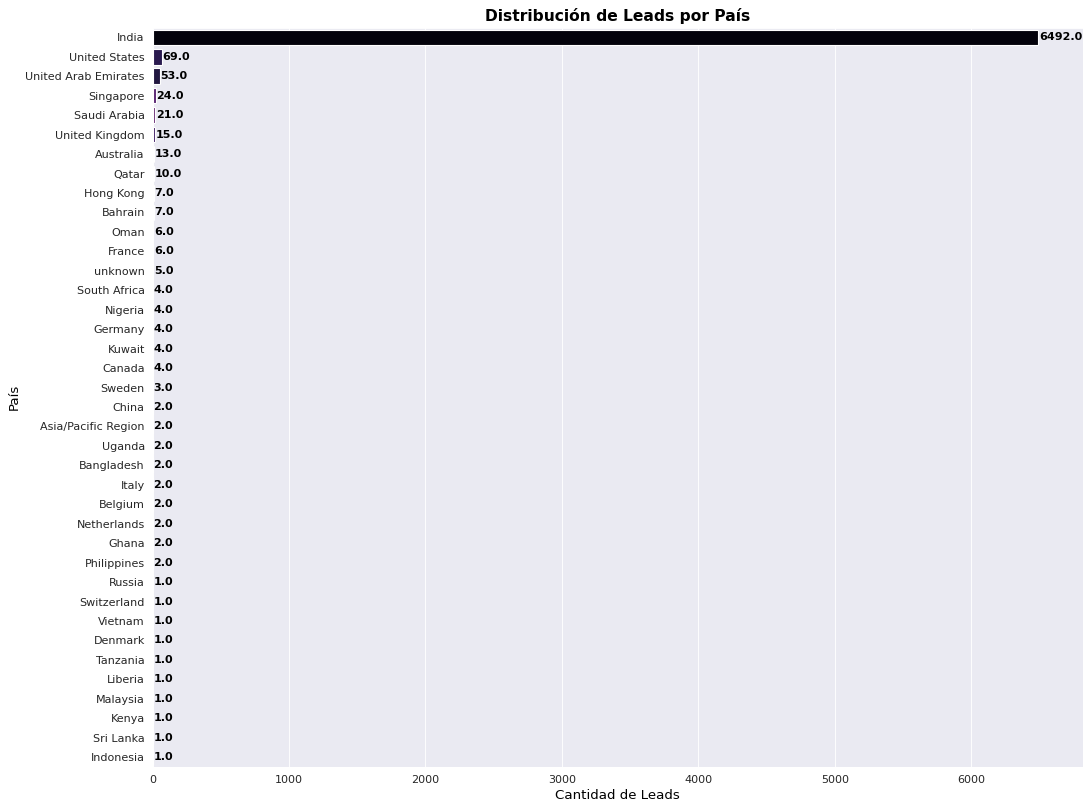

In [391]:
# Analicemos Country: el pa√≠s del lead
# Gr√°fico de Distribuci√≥n de Leads por Pa√≠s
plt.figure(figsize=(15, 12), dpi=80)
sns.set_style("darkgrid")
ax = sns.countplot(
    y='Country',
    data=df,
    order=df['Country'].value_counts().index,
    hue= 'Country',
    palette="magma",
    legend=False
)
plt.title("Distribuci√≥n de Leads por Pa√≠s", fontsize=14, fontweight='bold', color='black')
plt.xlabel("Cantidad de Leads", fontsize=12, color='black')
plt.ylabel("Pa√≠s", fontsize=12, color='black')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 5, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', fontweight='bold')
plt.show()

El n√∫mero de datos faltantes en la variable 'Country' representa m√°s de una cuarta parte del total.  
Adem√°s, m√°s de dos terceras partes de los registros pertenecen a India.  

Dado este contexto, no ser√≠a ideal simplemente asignar el valor 'Desconocido' a los valores nulos,  
especialmente cuando hay una alta probabilidad de que estos registros correspondan a India.  

Para una imputaci√≥n m√°s informada, podemos aprovechar otra variable disponible en los datos, como 'City',  
la cual podr√≠a ayudarnos a inferir el pa√≠s correspondiente a los valores faltantes de manera m√°s precisa.  

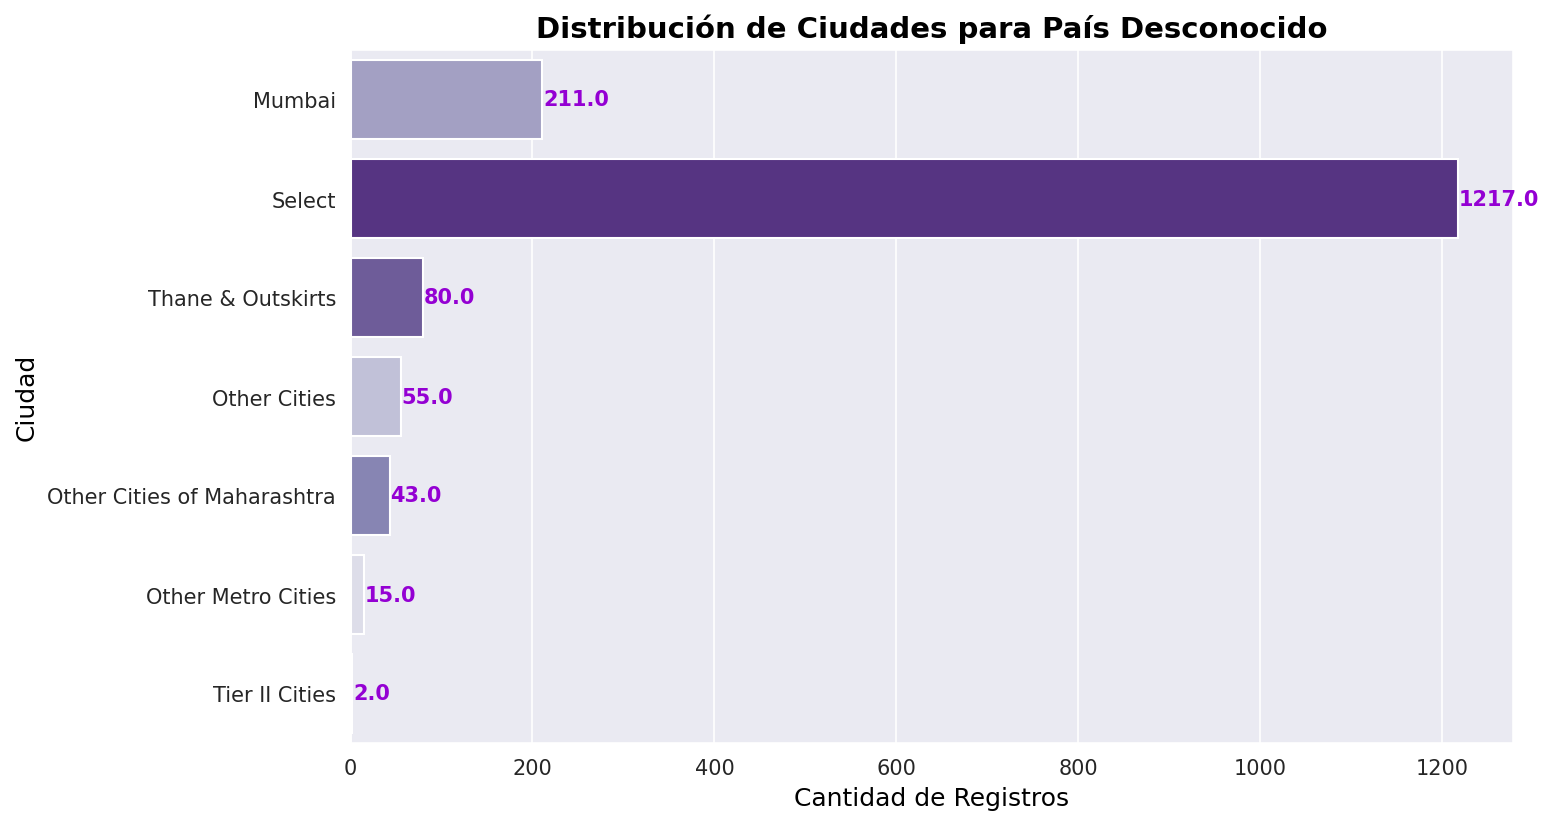

In [392]:
# Grafiquemos la distribuci√≥n de 'City' cuando 'Country' es un dato faltante
plt.figure(figsize=(10, 6), dpi=150)
sns.set_style("darkgrid")
ax = sns.countplot(
    y='City',
    data=df[df['Country'].isna()],
    order=df['City'].value_counts().index,
    hue =  'City',
    palette="Purples_r",
    legend = False
)
plt.title("Distribuci√≥n de Ciudades para Pa√≠s Desconocido", fontsize=14, fontweight='bold', color='black')
plt.xlabel("Cantidad de Registros", fontsize=12, color='black')
plt.ylabel("Ciudad", fontsize=12, color='black')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10, color='darkviolet', fontweight='bold')
plt.show()

üîç An√°lisis y Tratamiento de Valores Faltantes en 'Country'

El an√°lisis de la variable 'City' nos proporciona informaci√≥n clave para imputar los valores faltantes de 'Country'.  
Observamos que la mayor√≠a de los registros pertenecen a la India y que ciertas ciudades son claramente indicativas de este pa√≠s.

üìå Estrategia de Imputaci√≥n:
- Si la ciudad es **Mumbai**, **Other Cities of Maharashtra** o **Thane & Outskirts**, asignamos **'India'** como pa√≠s.
- Para las dem√°s ciudades con 'Country' faltante, asignamos **'Desconocido'**, ya que no hay una relaci√≥n tan evidente con un pa√≠s espec√≠fico.

Esta estrategia nos permite recuperar informaci√≥n valiosa sin introducir sesgo al dataset.  
Implementaremos esta l√≥gica con un bucle `for` y una condici√≥n `if` anidada para asignar los valores de manera eficiente. üöÄ

In [393]:
ciudades_india = ['Mumbai','Other Cities of Maharashtra','Thane & Outskirts']

In [394]:
for i in df[df['Country'].isnull()].index:
    if df.loc[i, 'City'] in ciudades_india:
        df.loc[i, 'Country'] = 'India'
    else:
        df.loc[i, 'Country'] = 'Desconocido'

üìå Correcci√≥n de Tipo de Datos: Variables de Fuente de Informaci√≥n

Las siguientes variables indican el canal a trav√©s del cual un cliente ha visto un anuncio o ha interactuado con la empresa:

üîπ **Search** ‚Üí Cliente encontr√≥ el anuncio mediante una b√∫squeda en la web.  
üîπ **Magazine** ‚Üí Cliente vio el anuncio en una revista.  
üîπ **Newspaper Article** ‚Üí Cliente encontr√≥ el anuncio en un art√≠culo de peri√≥dico.  
üîπ **X Education Forums** ‚Üí Cliente descubri√≥ el anuncio en un foro de educaci√≥n.  
üîπ **Newspaper** ‚Üí Cliente vio el anuncio en un peri√≥dico.  
üîπ **Digital Advertisement** ‚Üí Cliente encontr√≥ el anuncio en un anuncio digital.  
üîπ **Through Recommendations** ‚Üí Cliente lleg√≥ por recomendaciones.  
üîπ **Receive More Updates About Our Courses** ‚Üí Cliente opt√≥ por recibir m√°s informaci√≥n sobre los cursos.

‚úÖ **Conversi√≥n a valores booleanos:**  
Para facilitar el an√°lisis y mejorar la interpretaci√≥n en modelos, convertiremos estas variables en valores `0` (No) y `1` (S√≠).  
Esto permitir√° una manipulaci√≥n m√°s eficiente y una integraci√≥n directa en modelos predictivos. üöÄ

In [395]:
# Las variables son similares, y no tienen valores faltantes
# Les daremos un tratamiento similar. Lo convertiremos a valores booleanos con un lazo for
mapeo_binario = {'Yes': 1, 'No': 0}
for col in ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses']:
    df[col] = df[col].replace(mapeo_binario).astype(bool)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        924

<ipython-input-395-1b864ca36ec8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapeo_binario).astype(bool)
<ipython-input-395-1b864ca36ec8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapeo_binario).astype(bool)
<ipython-input-395-1b864ca36ec8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.se

üìå Manejo de Valores Nulos: Variables Categ√≥ricas

Algunas caracter√≠sticas en nuestro dataset contienen valores nulos que deben ser tratados para evitar sesgos o p√©rdida de informaci√≥n. Veamos cu√°les son y c√≥mo abordarlas:

üîπ **Specialization** ‚Üí Representa el dominio de la industria en la que el cliente trabaj√≥ anteriormente.  
   üìå Incluye la opci√≥n 'Select Specialization', lo que indica que el cliente no eligi√≥ ninguna opci√≥n al llenar el formulario.  

üîπ **How did you hear about X Education** ‚Üí Fuente por la cual el cliente conoci√≥ X Education.  
   üìå Es clave para evaluar la efectividad de los canales de comunicaci√≥n.  

üîπ **What is your current occupation** ‚Üí Indica si el cliente es estudiante, desempleado o empleado.  
   üìå Nos da contexto sobre el perfil del usuario y su disponibilidad para el curso.  

üîπ **What matters most to you in choosing a course** ‚Üí Opci√≥n elegida por el cliente sobre el principal motivo para tomar el curso.  

‚úÖ **Estrategia de Imputaci√≥n:**  
Para manejar estos valores nulos, primero evaluaremos su distribuci√≥n.  
Podemos imputar los valores faltantes uno a uno manualmente o utilizar un **bucle for** para automatizar el proceso, garantizando un tratamiento uniforme y eficiente.  

In [396]:
# Examinaremos la distribuci√≥n de las variables de formulario
# Tambien haremos una lista de las 4 variables, y luego haremos un lazo for para graficarlas como subplots.
variables = ['Specialization', 'How did you hear about X Education',
             'What is your current occupation','What matters most to you in choosing a course']

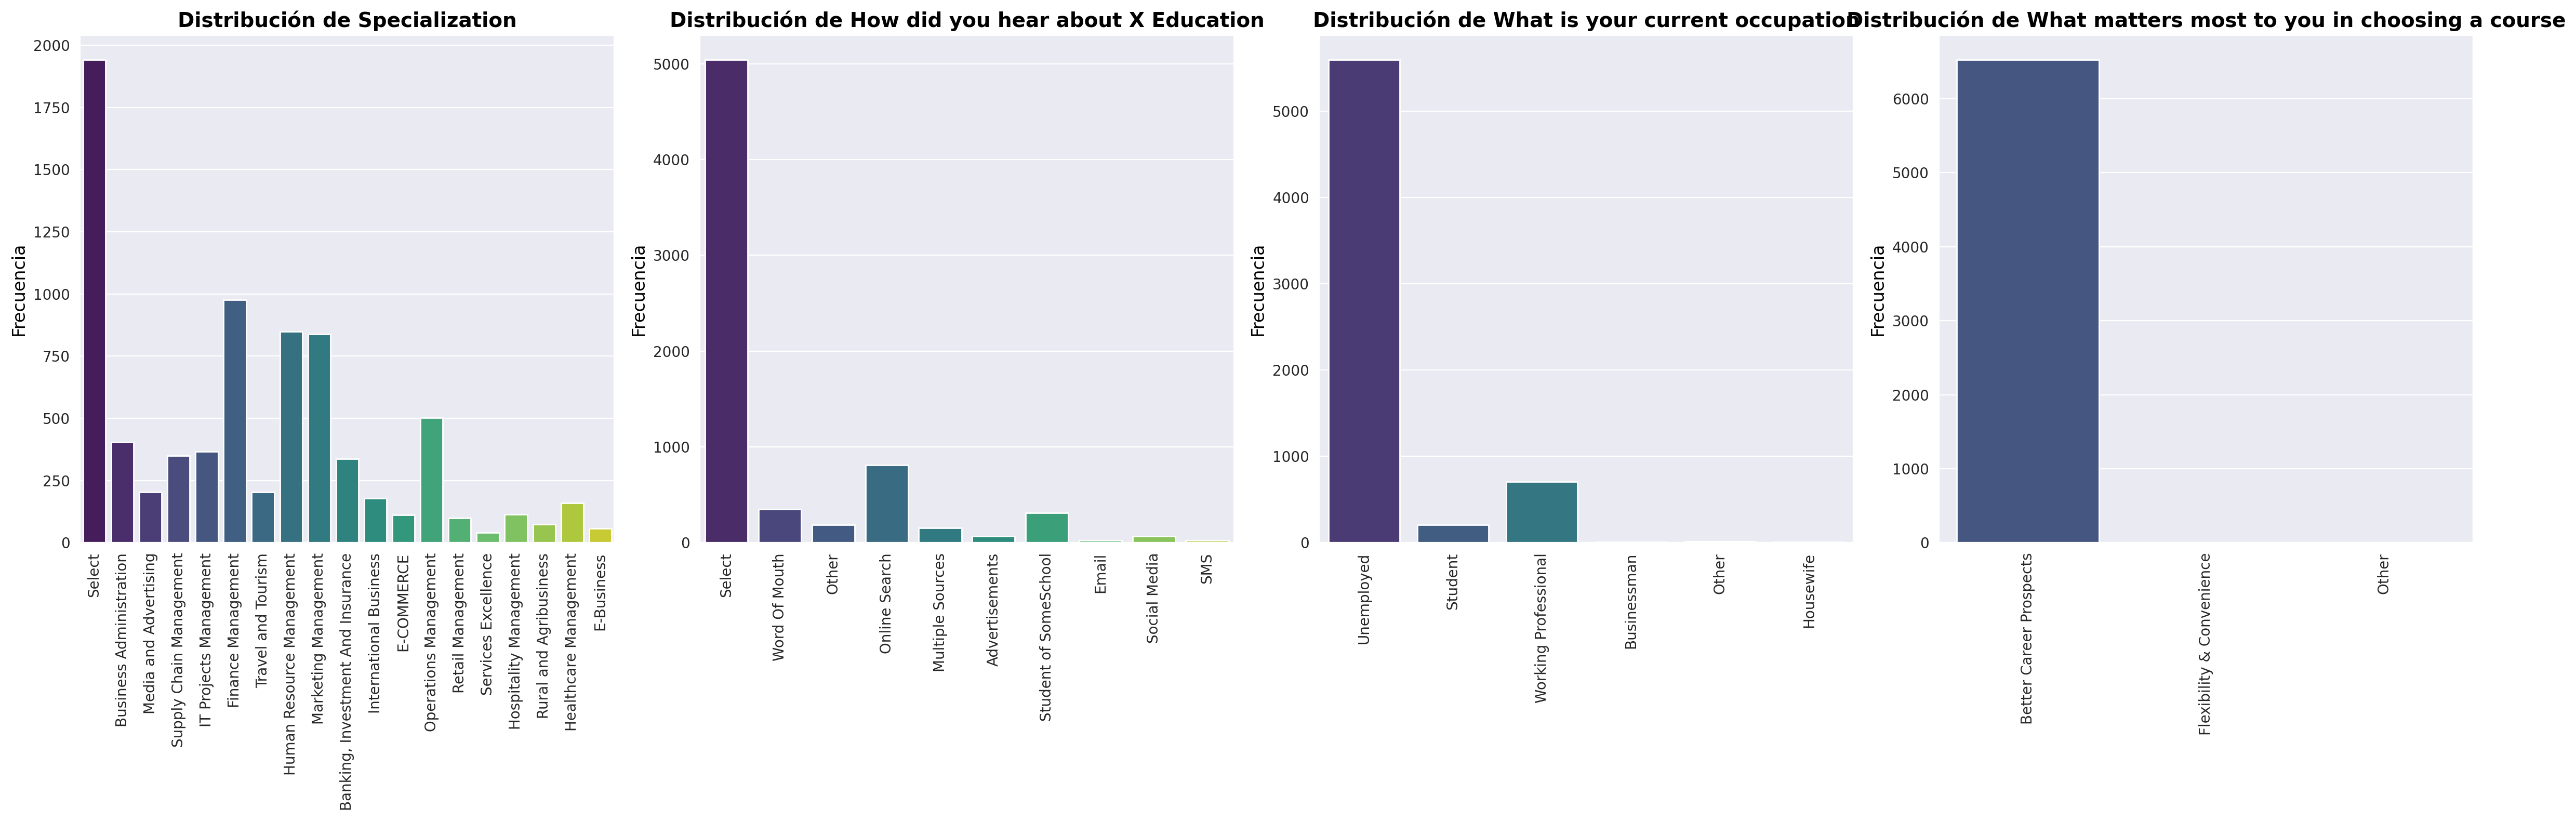

In [397]:
# Graficamos
fig, ejes = plt.subplots(nrows=1, ncols=4, figsize=(24, 8), dpi=200)
paleta_colores = sns.color_palette("viridis", as_cmap=True)
#Iteracion sobre las variables
for i, ax in enumerate(ejes):
    sns.countplot(
        x=variables[i],
        data=df,
        ax=ax,
        hue=variables[i],
        palette="viridis",
        legend=False
    )
    ax.set_title(f"Distribuci√≥n de {variables[i]}", fontsize=14, fontweight='bold', color='black')
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia", fontsize=12, color='black')
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
plt.tight_layout()
plt.show()


# üîç An√°lisis de variables categ√≥ricas y manejo de valores faltantes
Los gr√°ficos muestran la distribuci√≥n de valores para distintas variables categ√≥ricas dentro del conjunto de datos.
Se observa que una gran cantidad de registros tienen la etiqueta 'Select', lo cual indica que el usuario no eligi√≥ ninguna opci√≥n
al completar el formulario. En t√©rminos de an√°lisis de datos, estos valores son equivalentes a datos faltantes, ya que no aportan
informaci√≥n √∫til sobre la categor√≠a real.

üìå **Caso especial: 'What matters most to you in choosing a course'**
En esta variable, la opci√≥n 'Better Career Prospects' domina significativamente sobre 'Flexibility & Convenience' y 'Others'.
Esto sugiere que la mayor√≠a de los encuestados priorizan las oportunidades de crecimiento profesional al seleccionar un curso.

üõ† **Posible estrategia de imputaci√≥n**
Si fuera necesario, podr√≠amos imputar los valores faltantes utilizando la moda ('Better Career Prospects'), ya que esta opci√≥n
es abrumadoramente la m√°s elegida. Sin embargo, para garantizar la coherencia y mantener la integridad de los datos,
optaremos por asignar 'Desconocido' a los valores faltantes en todas las variables, incluida esta.

‚úÖ **Conclusi√≥n**
Aunque la imputaci√≥n con la moda es una alternativa v√°lida en este caso, seguiremos un enfoque m√°s conservador y
neutralizando la incertidumbre con la categor√≠a 'Desconocido'.

In [398]:
# Reemplacemos los valores 'Select' y faltantes con 'Desconocido'
for c in variables:
    df[c] = df[c].replace('Select', 'Desconocido')
    df[c] = df[c].fillna('Desconocido')

Correcci√≥n de Tipo de Datos: Update me on Supply Chain Content, Get updates on DM Content

Estas variables indican si el cliente ha expresado inter√©s en recibir actualizaciones sobre ciertos temas:

- 'Update me on Supply Chain Content': Muestra si el cliente desea recibir actualizaciones sobre el contenido de la cadena de suministro.
- 'Get updates on DM Content': Indica si el cliente quiere recibir actualizaciones sobre el contenido de DM.

Para mejorar su manipulaci√≥n, interpretaci√≥n y uso en modelos, convertiremos estas caracter√≠sticas en valores booleanos.

In [399]:
for c in ['Update me on Supply Chain Content', 'Get updates on DM Content']:
    df[c] = df[c].map({'Yes': 1, 'No': 0}).astype(bool)

üìå **Eliminar variable: Tags**

üîç **¬øQu√© es 'Tags'?**  
Es una etiqueta asignada a los clientes que indica su estado actual como potenciales clientes dentro del embudo de marketing.

‚ùå **¬øPor qu√© eliminarla?**  
'Tags' se asigna en funci√≥n del avance del cliente en el proceso de conversi√≥n. Esto significa que est√° **altamente correlacionada** con la variable que queremos predecir (Converted). En otras palabras, ser√≠a como usar la respuesta de un examen para predecir la nota: ¬°no tiene sentido! üö´üìâ

üìñ **Un poco de teor√≠a**  
En estad√≠stica y modelos predictivos, **una variable end√≥gena** es aquella cuyo valor est√° influenciado por otras variables dentro del sistema. En este caso, 'Tags' se asigna en funci√≥n del avance en el embudo de ventas, por lo que est√° **dentro del proceso de conversi√≥n** y no debe ser considerada como una variable independiente.

üõ†Ô∏è **Decisi√≥n final:**  
Para evitar sesgos y garantizar un modelo s√≥lido, eliminamos la variable 'Tags' antes del modelado. üî•

In [400]:
# Eliminamos variable Tags
df.drop(columns='Tags', axis = 1, inplace = True)

üìå **Eliminar variable: Lead Quality**

üîç **¬øQu√© es 'Lead Quality'?**  
Es una evaluaci√≥n subjetiva de la calidad de un potencial cliente, basada en los datos disponibles y en la intuici√≥n del empleado asignado. üßêüìä

‚ùå **¬øPor qu√© eliminarla?**  
El objetivo de nuestro modelo es calcular el **Lead Score**, una m√©trica objetiva para evaluar la calidad de un lead. Si usamos 'Lead Quality' como variable de entrada, estar√≠amos introduciendo **redundancia** y posiblemente **sesgo humano**, lo que afectar√≠a la imparcialidad del modelo. ‚ö†Ô∏èüìâ

üìñ **Concepto clave**  
Si una variable est√° directamente relacionada con la m√©trica que queremos predecir, incluirla en el modelo **puede generar una falsa sensaci√≥n de precisi√≥n**, pero en realidad solo estamos d√°ndole la respuesta al modelo. ¬°Eso no es Machine Learning real! üöÄ

In [401]:
# Eliminamos variable Lead Quality
df.drop(columns='Lead Quality', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        924


üìå **Manejo de Nulos: Lead Profile**

üîç **¬øQu√© es 'Lead Profile'?**  
Es un nivel asignado a cada cliente seg√∫n su perfil, lo que ayuda a clasificar los leads en funci√≥n de sus caracter√≠sticas y potencial. üéØüìä

‚ùì **¬øPor qu√© manejar los nulos?**  
Si 'Lead Profile' tiene valores faltantes, podr√≠amos estar perdiendo informaci√≥n clave para la segmentaci√≥n de clientes. Sin embargo, antes de imputar estos valores, es importante analizar su distribuci√≥n. üìâüßê

üìä **Paso a paso:**  
1Ô∏è‚É£ **Explorar la distribuci√≥n** ‚Üí ¬øEs una variable categ√≥rica balanceada o hay una categor√≠a dominante?  
2Ô∏è‚É£ **Determinar la mejor estrategia** ‚Üí Podemos imputar con la moda (categor√≠a m√°s frecuente) o etiquetar los nulos como 'Desconocido' si la variabilidad es alta.  
3Ô∏è‚É£ **Aplicar la imputaci√≥n** ‚Üí ¬°Sin sesgar el modelo! Siempre considerando la coherencia con el resto de los datos. üöÄ  




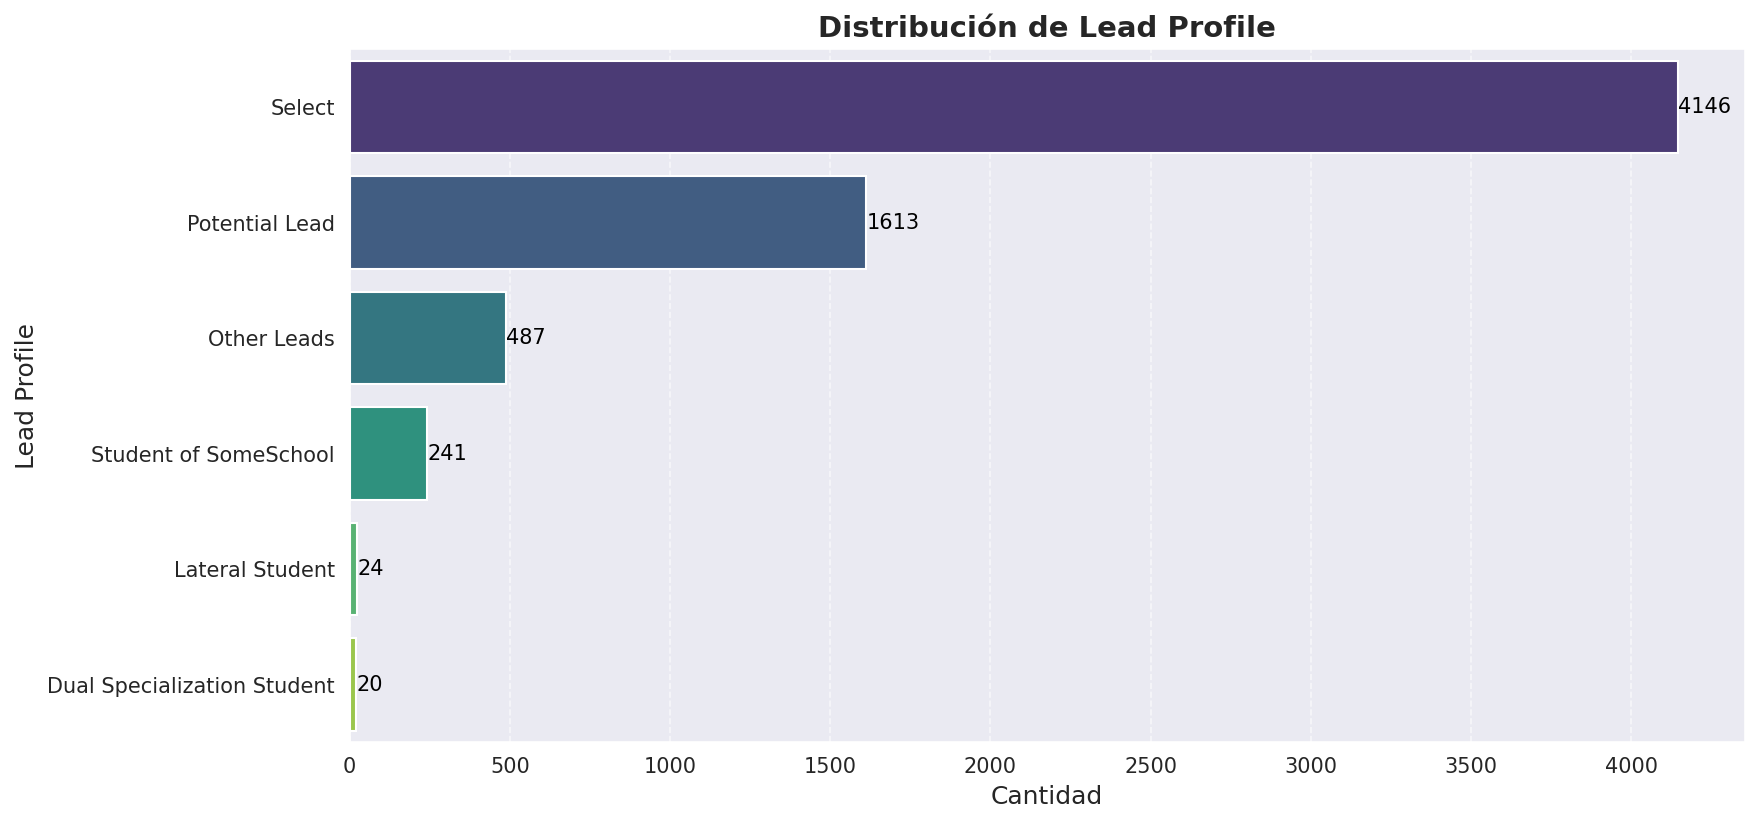

In [402]:
# Gr√°fico de Distribuci√≥n de Lead Profile
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(
    y=df['Lead Profile'].value_counts().index,
    x=df['Lead Profile'].value_counts().values,
    palette='viridis',
    hue=df['Lead Profile'].value_counts().index,
    legend=False
)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Lead Profile', fontsize=12)
plt.title('Distribuci√≥n de Lead Profile', fontsize=14, fontweight='bold')
for index, value in enumerate(df['Lead Profile'].value_counts().values):
    plt.text(value + 1, index, str(value), va='center', fontsize=10, color='black')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Una gran parte de los valores son "Select", lo cual es equivalente a un nulo.

In [403]:
# Reemplacemos Select por Desconocido
# Rellenemos los valores faltantes con Desconocido
df['Lead Profile'] = df['Lead Profile'].replace('Select', 'Desconocido')

In [404]:
df['Lead Profile'] = df['Lead Profile'].fillna('Desconocido')


#üìå Manejo de Nulos: City

La variable 'City' representa la ciudad del cliente potencial. üåç

üîé Antes de decidir c√≥mo manejar los valores nulos, es fundamental analizar su distribuci√≥n.
¬øLos datos est√°n concentrados en unas pocas ciudades o son bastante variados? ¬øExisten patrones en los valores faltantes?

üéØ Bas√°ndonos en este an√°lisis, podremos elegir la mejor estrategia de imputaci√≥n:
   - üîπ Si la mayor√≠a de los datos pertenecen a una ciudad en particular, podr√≠amos imputar la moda.
   - üîπ Si la distribuci√≥n es uniforme, podr√≠amos etiquetar los valores nulos como 'Desconocido'.
   - üîπ O bien, en casos espec√≠ficos, podr√≠amos imputar seg√∫n caracter√≠sticas relacionadas como el pa√≠s o la regi√≥n del cliente.

‚ú® Una correcta imputaci√≥n garantiza que los datos sean m√°s confiables y √∫tiles en el an√°lisis posterior.

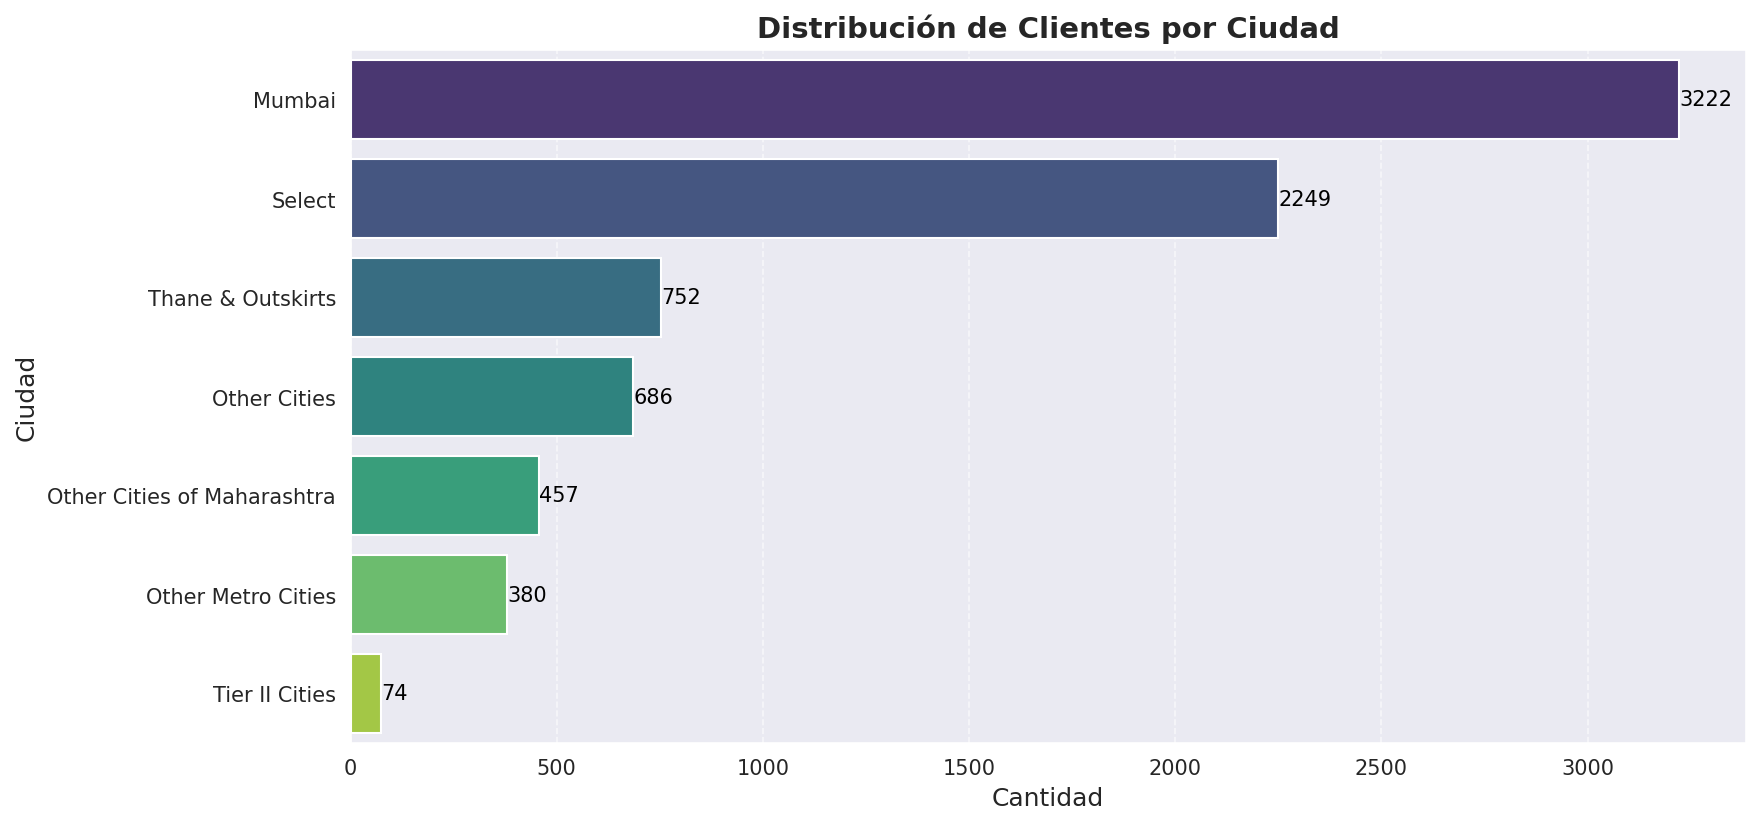

In [405]:
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(
    y=df['City'].value_counts().index,
    x=df['City'].value_counts().values,
    palette='viridis',
    hue=df['City'].value_counts().index,
    legend=False
)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)
plt.title('Distribuci√≥n de Clientes por Ciudad', fontsize=14, fontweight='bold')
for index, value in enumerate(df['City'].value_counts().values):
    plt.text(value + 1, index, str(value), va='center', fontsize=10, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


Una gran parte de los valores son "Select", lo cual es equivalente a un nulo.

In [406]:
# Reemplacemos Select por Desconocido
# Rellenemos los valores faltantes con Desconocido
df['City'] = df['City'].replace({'Select': 'Desconocido'})
df['City'] = df['City'].fillna('Desconocido')


üìå **Correcci√≥n de Tipo de Datos:**  
Las siguientes variables representan respuestas binarias (S√≠/No) y se convertir√°n en valores booleanos (`True`/`False`) para facilitar su an√°lisis y uso en modelos predictivos:

üîπ **I agree to pay the amount through cheque:**  
   Indica si el cliente ha aceptado realizar el pago mediante cheque.  

üîπ **A free copy of Mastering The Interview:**  
   Indica si el cliente ha solicitado una copia gratuita del libro *Mastering The Interview*.  

‚úÖ **Raz√≥n de la conversi√≥n:**  
Al transformar estas variables a formato booleano, se facilita la manipulaci√≥n, interpretaci√≥n y modelado de los datos, optimizando su uso en an√°lisis y predicciones.  

In [407]:
# Convirtamos las variables Yes/No a booleanos
columns_to_convert = ['I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.map({'Yes': True, 'No': False}))


Correcci√≥n del tipo de datos: Object to Category

In [408]:
# Convirtamos los datos tipo string a categorias
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].astype('category')

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   category
 1   Lead Source                                    9240 non-null   category
 2   Do Not Email                                   9240 non-null   bool    
 3   Do Not Call                                    9240 non-null   bool    
 4   Converted                                      9240 non-null   bool    
 5   TotalVisits                                    9240 non-null   float64 
 6   Total Time Spent on Website                    9240 non-null   int64   
 7   Page Views Per Visit                           9240 non-null   float64 
 8   Last Activity                                  9240 non-null   category
 9   Country                                

üìä √çndices y Puntuaciones Asim√©tricas üìä

Los siguientes indicadores cuantifican la actividad y el perfil de cada cliente, proporcionando informaci√≥n sobre su comportamiento y caracter√≠sticas dentro del sistema:

üîπ **Asymmetrique Activity Index**:
   - Clasifica la actividad del cliente en tres niveles: **Alto, Medio y Bajo**.
   - Permite identificar qu√© tan activo ha sido un cliente en funci√≥n de sus interacciones.

üîπ **Asymmetrique Profile Index**:
   - Categoriza el perfil del cliente en tres niveles: **Alto, Medio y Bajo**.
   - Ayuda a segmentar a los clientes seg√∫n sus caracter√≠sticas demogr√°ficas o de comportamiento.

üîπ **Asymmetrique Activity Score**:
   - Asigna una puntuaci√≥n num√©rica a cada cliente en funci√≥n de su actividad.
   - Puede utilizarse para identificar clientes altamente comprometidos.

üîπ **Asymmetrique Profile Score**:
   - Otorga una puntuaci√≥n basada en el perfil del cliente.
   - Permite evaluar qu√© tan alineado est√° un cliente con el perfil ideal.

üìå **Siguiente paso**: Evaluar la distribuci√≥n de estos indicadores para determinar el m√©todo de imputaci√≥n de nulos m√°s adecuado.

In [410]:
# Estad√≠sticas descriptivas de los scores
estadisticas_scores = pd.DataFrame(
    {'Assymmetrique Activity Score': df['Asymmetrique Activity Score'].describe(),
    'Asymmetrique Profile Score': df['Asymmetrique Profile Score'].describe()})
estadisticas_scores

Assymmetrique Activity Score  Asymmetrique Profile Score
count                   5022.000000                 5022.000000
mean                      14.306252                   16.344883
std                        1.386694                    1.811395
min                        7.000000                   11.000000
25%                       14.000000                   15.000000
50%                       14.000000                   16.000000
75%                       15.000000                   18.000000
max                       18.000000                   20.000000

In [411]:
# Notemos que la mediana, est√° un poco a la izquiera (es decir es menor) que la media en ambos casos. Para confirmar,
# h√°gamos un histograma
# Grafiquemos la distribuci√≥n de los scores
scores = ['Asymmetrique Activity Score','Asymmetrique Profile Score']

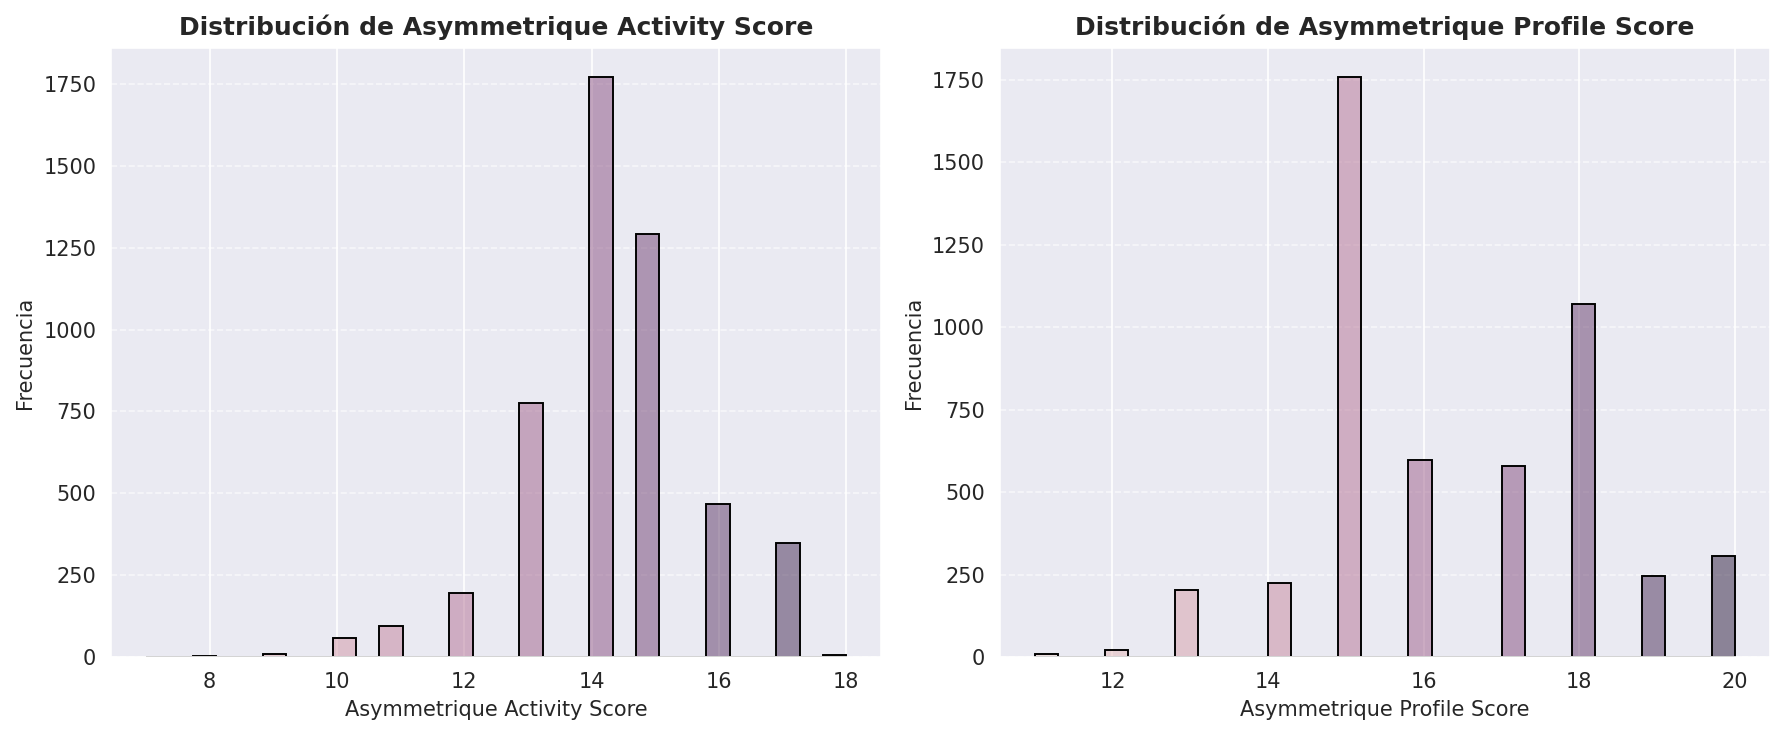

In [412]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=150)
for i, score in enumerate(scores):
    sns.histplot(
        data=df, x=score, ax=axes[i],
        bins=30, kde=True, color="royalblue", edgecolor="black",
        hue=score, legend=False
    )
    axes[i].set_title(f'Distribuci√≥n de {score}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(score, fontsize=10)
    axes[i].set_ylabel('Frecuencia', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Ambas distribuciones est√°n sesgadas, lo que significa que el uso de la media podr√≠a no ser la mejor opci√≥n para imputar valores faltantes.
Dado que la mediana es menos sensible a valores at√≠picos y proporciona una mejor representaci√≥n central en distribuciones sesgadas,
es m√°s adecuado utilizarla para el llenado de datos nulos en este caso.

In [413]:
for s in scores:
    df.loc[:, s] = df[s].fillna(df[s].median())


In [414]:
# Ahora realizaremos un histograma para los √≠ndices
indices = ['Asymmetrique Activity Index','Asymmetrique Profile Index']

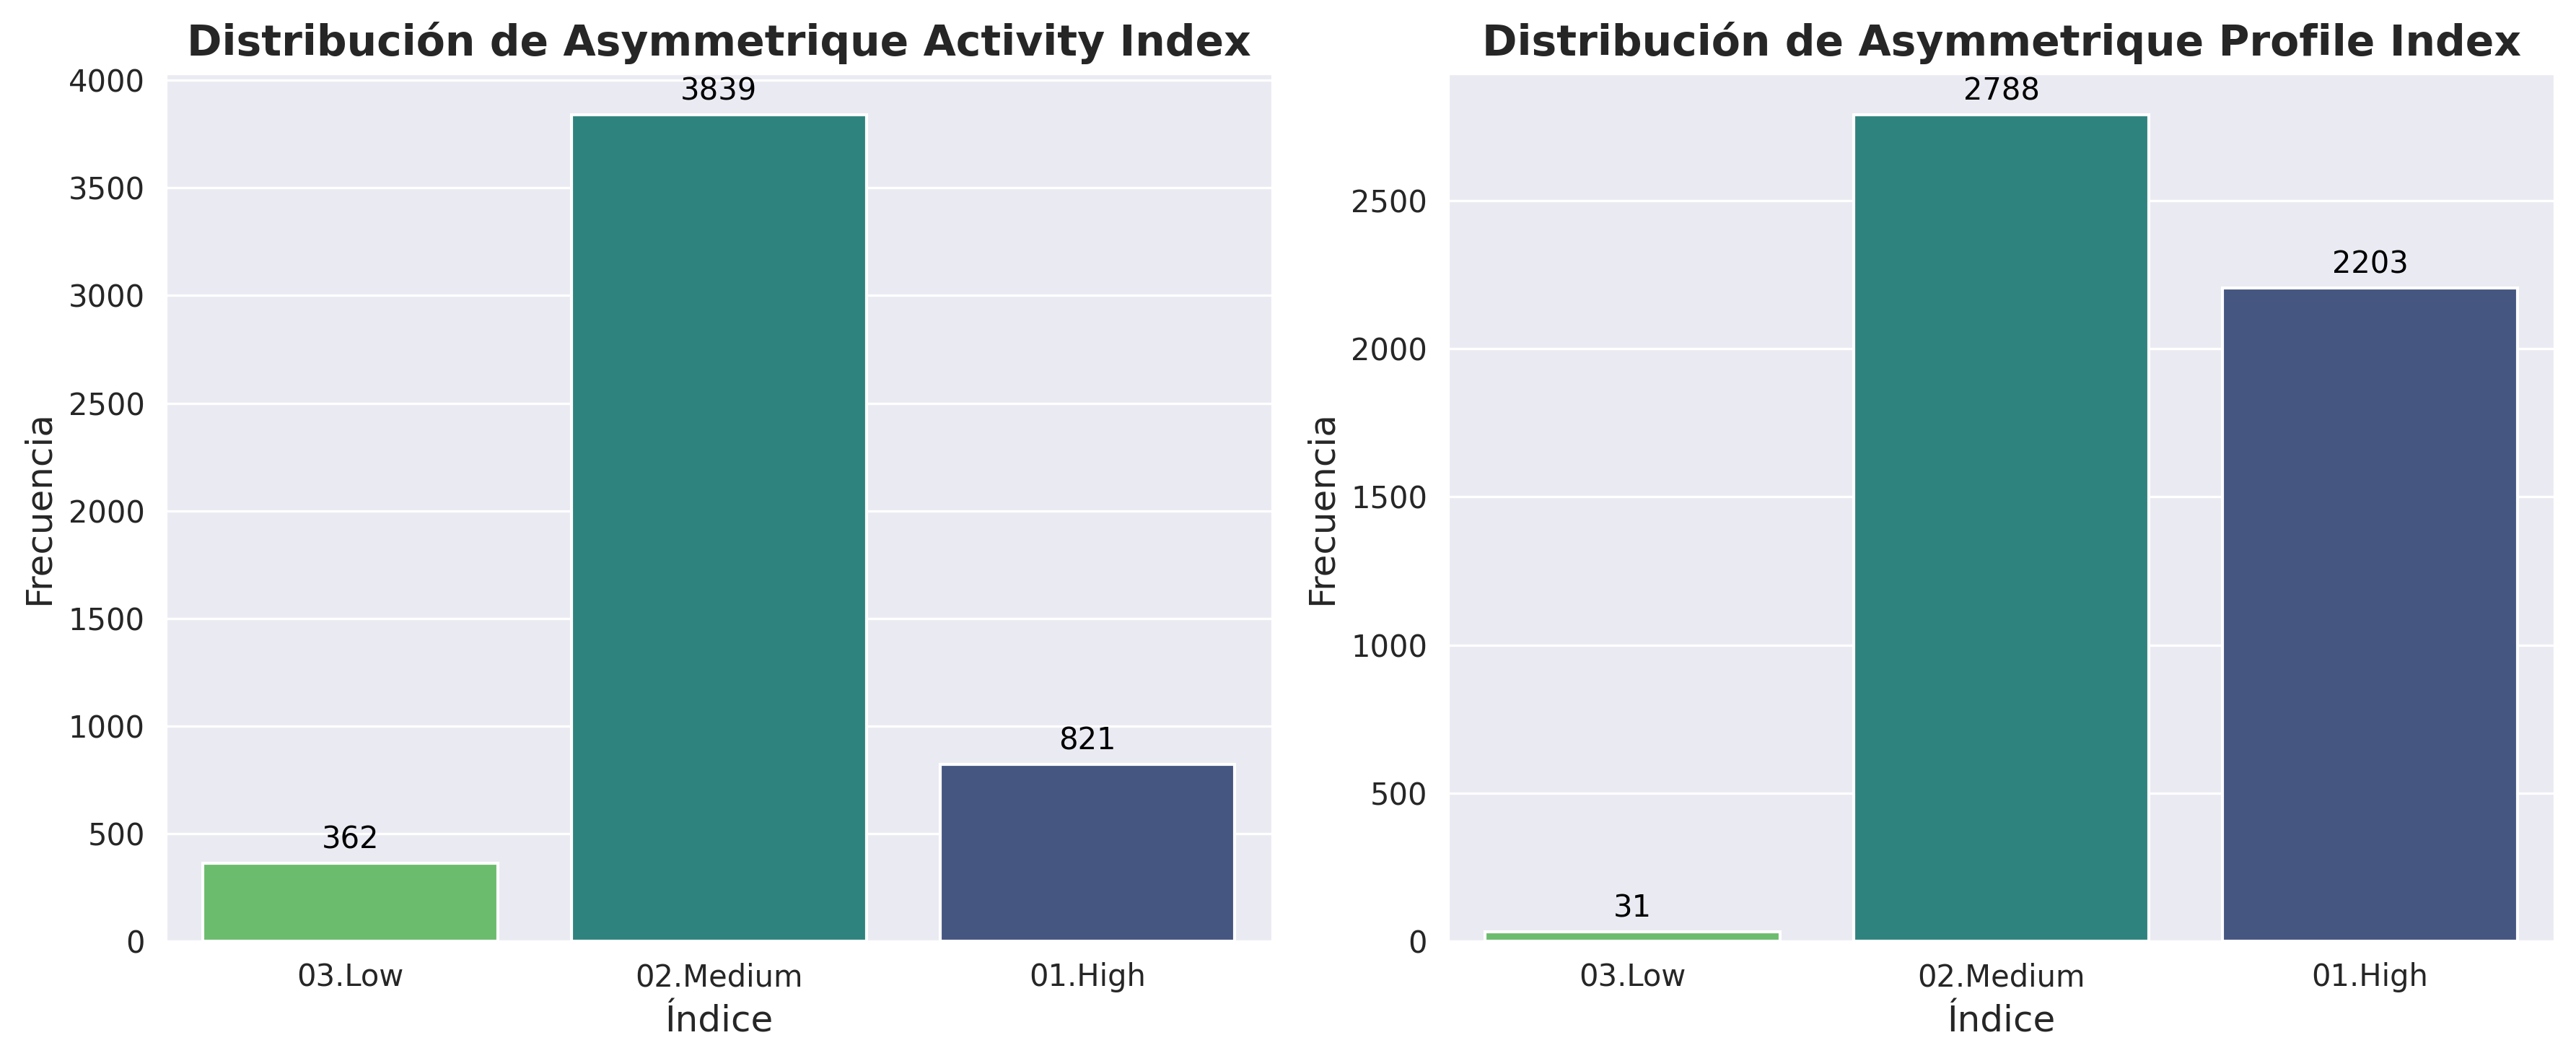

In [415]:
fig, ejes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=300)
for i, ax in enumerate(ejes):
    sns.countplot(
        x=indices[i],
        data=df,
        ax=ax,
        order=['03.Low', '02.Medium', '01.High'],
        palette='viridis',
        hue=indices[i],
        legend=False
    )
    ax.set_xlabel("√çndice", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_title(f"Distribuci√≥n de {indices[i]}", fontsize=14, fontweight='bold')


    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()
plt.show()


üîç **An√°lisis de √çndices y Puntuaciones Asim√©tricas**  

Parece que las caracter√≠sticas del √≠ndice (`Asymmetrique Activity Index` y `Asymmetrique Profile Index`) podr√≠an ser simplemente una categorizaci√≥n de las puntuaciones asim√©tricas (`Asymmetrique Activity Score` y `Asymmetrique Profile Score`).  

üìå **¬øPor qu√© esto es importante?**  
Si los √≠ndices solo reflejan rangos de las puntuaciones, entonces son redundantes y no aportan informaci√≥n adicional. En este caso, podr√≠amos eliminarlos sin perder valor en el an√°lisis.  

üìä **¬øC√≥mo lo comprobamos?**  
Para verificarlo, podemos calcular la puntuaci√≥n asim√©trica promedio para cada categor√≠a de √≠ndice. Si encontramos una relaci√≥n clara (por ejemplo, que los valores "High" siempre tienen una puntuaci√≥n m√°s alta y "Low" siempre una m√°s baja), entonces confirmamos que los √≠ndices no a√±aden informaci√≥n nueva.  

üõ† **Pr√≥ximo paso:**  
Procederemos a analizar la relaci√≥n entre los √≠ndices y las puntuaciones para tomar una decisi√≥n informada sobre su inclusi√≥n en el modelo.  

In [416]:
# Agruparemos por el √çndice de Actividad Asim√©trico
agrupados_por_activity_index = (
    df.groupby('Asymmetrique Activity Index', observed=True)['Asymmetrique Activity Score']
    .mean()
    .reset_index()
    .rename(columns={'Asymmetrique Activity Score': 'Media Activity Score'})
)
agrupados_por_activity_index

Asymmetrique Activity Index  Media Activity Score
0                     01.High             16.437272
1                   02.Medium             14.134931
2                      03.Low             11.290055

In [417]:
# Ahora agrupamos por el √çndice de Perfil Asim√©trico
agrupados_por_profile_index = (
    df.groupby('Asymmetrique Profile Index', observed=True)['Asymmetrique Profile Score']
    .mean()
    .reset_index()
    .rename(columns={'Asymmetrique Profile Score': 'Media Profile Score'})
)

agrupados_por_profile_index

Asymmetrique Profile Index  Media Profile Score
0                    01.High            18.128007
1                  02.Medium            14.987446
2                     03.Low            11.709677

Como se puede observar de los c√°lculos anteriores, los valores de Asymmetrique Activity/Profile Index parecen simplemente agrupar los Asymmetrique Activity/Profile Scores. Como resultado, las caracter√≠sticas del √≠ndice son redundantes y pueden ser eliminadas.

In [418]:
# Elimemos las columnas de √≠ndice
df.drop(columns=['Asymmetrique Profile Index','Asymmetrique Activity Index'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   category
 1   Lead Source                                    9240 non-null   category
 2   Do Not Email                                   9240 non-null   bool    
 3   Do Not Call                                    9240 non-null   bool    
 4   Converted                                      9240 non-null   bool    
 5   TotalVisits                                    9240 non-null   float64 
 6   Total Time Spent on Website                    9240 non-null   int64   
 7   Page Views Per Visit                           9240 non-null   float64 
 8   Last Activity                                  9240 non-null   category
 9   Country                                

# üìä An√°lisis Exploratorio de las Variables Categ√≥ricas üöÄ

Antes de sumergirnos en modelos y predicciones, hagamos una pausa para conocer mejor nuestras variables categ√≥ricas.  
¬øPor qu√©? Porque entender su distribuci√≥n nos ayudar√° a detectar patrones, valores at√≠picos y posibles sesgos en los datos.  

En esta secci√≥n, visualizaremos la frecuencia de cada categor√≠a para responder preguntas clave como:  
‚úÖ ¬øExisten categor√≠as dominantes?  
‚úÖ ¬øTenemos clases poco representadas que podr√≠an afectar el an√°lisis?  
‚úÖ ¬øEs necesario agrupar o transformar algunas categor√≠as?  

Acomp√°√±ame en este recorrido por nuestros datos. ¬°Vamos a descubrir qu√© historias nos cuentan! üìä‚ú®

üìä Funci√≥n `conteo_de_convertidos`: Visualizaci√≥n de Conversi√≥n por Categor√≠a  

Esta funci√≥n genera un gr√°fico de barras (`countplot`) para comparar la cantidad de clientes convertidos y no convertidos  
en relaci√≥n con una variable categ√≥rica espec√≠fica.  

üîπ Nos ayudar√° a identificar patrones y tendencias en las variables categ√≥ricas.  
üîπ Facilita la interpretaci√≥n de la distribuci√≥n de conversiones dentro de cada categor√≠a.  

¬°Una herramienta clave para entender mejor nuestros datos antes del modelado! üöÄ

In [419]:
def conteo_de_convertidos(independiente, dependiente='Converted'):
    """
    üìä Genera un gr√°fico de barras para comparar la cantidad de clientes convertidos y no convertidos
    en funci√≥n de una variable categ√≥rica.

    üîπ independiente: Variable categ√≥rica a analizar.
    üîπ dependiente: Variable de conversi√≥n (por defecto 'Converted').
    """
    plt.figure(figsize=(12, 6), dpi=150)
    ax = sns.countplot(
        y=independiente,
        data=df,
        hue=dependiente,
        order=df[independiente].value_counts().index,
        palette="viridis",
        edgecolor="black"
    )

    plt.title(f"Distribuci√≥n de '{independiente}' por Conversi√≥n", fontsize=14, fontweight='bold')
    plt.xlabel("Cantidad", fontsize=12)
    plt.ylabel(independiente, fontsize=12)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.legend(title=dependiente, fontsize=10, loc='lower right', frameon=False)


    for p in ax.patches:
        if p.get_width() > 0:
            ax.annotate(
                f"{int(p.get_width())}",
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points'
            )

    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

In [420]:
# Ahora calcularemos la raz√≥n de conversi√≥n de leads en todo el conjunto de datos
tasa_de_conversion = round(df['Converted'].mean(), 2)
tasa_de_conversion

0.39

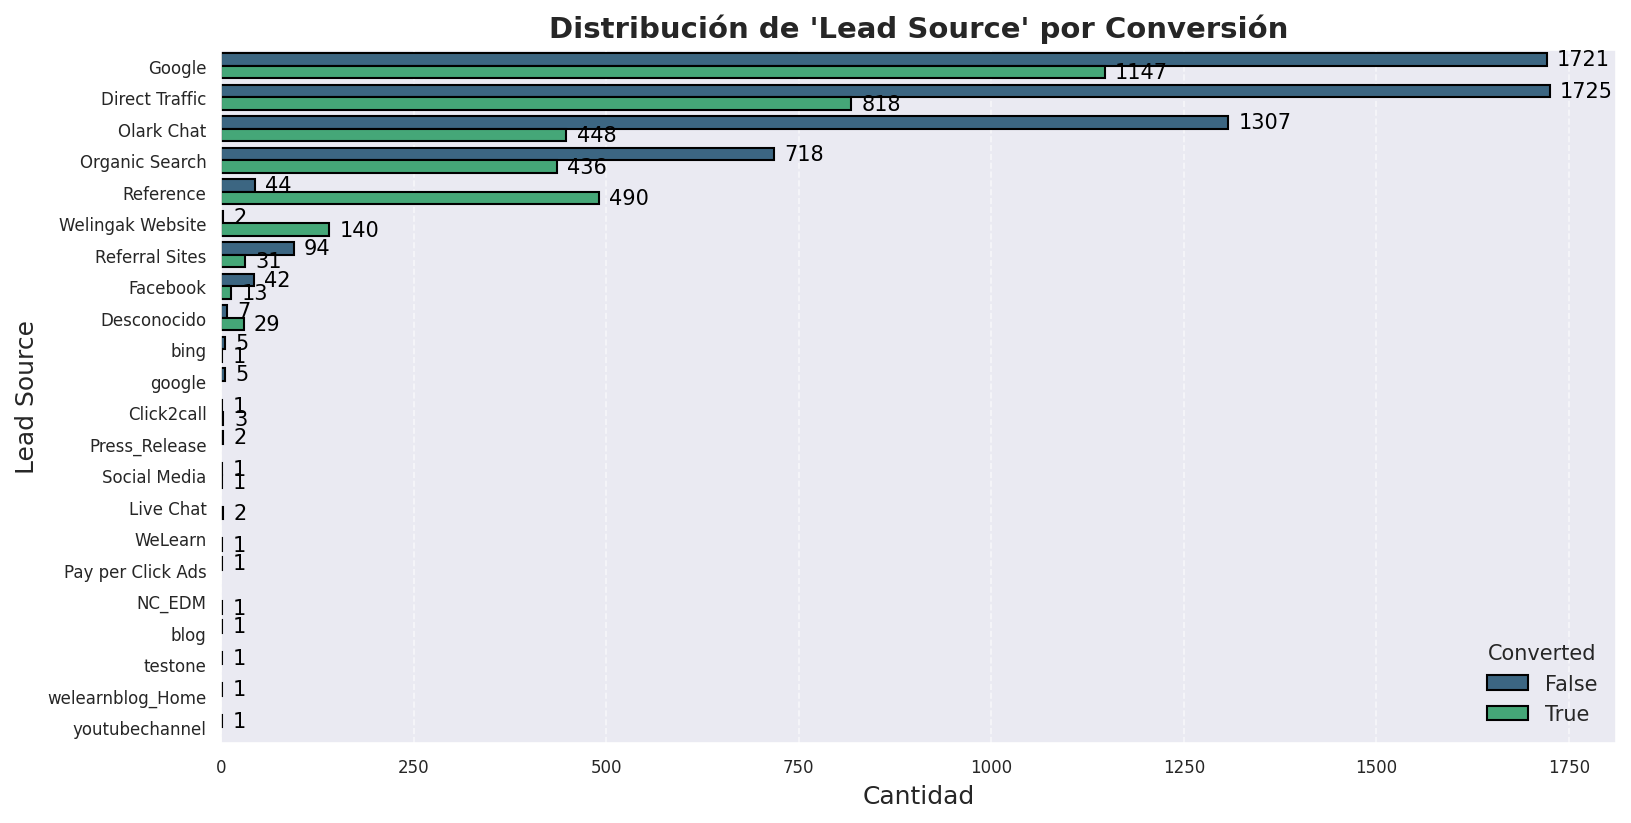

In [421]:
# An√°lisis Exploratorio de una Variable: Lead Source
conteo_de_convertidos('Lead Source')

üìå Los leads que provienen del sitio web de Wellingak o por referencia tienen una tasa de conversi√≥n m√°s alta.
   ‚û°Ô∏è Esto sugiere que fortalecer estas fuentes podr√≠a mejorar la conversi√≥n general.  

üìå Aunque Google y el Tr√°fico Directo generan un n√∫mero similar de leads,
   ‚û°Ô∏è La conversi√≥n es mayor en los leads provenientes de Google.  
   
üìå La B√∫squeda Org√°nica genera menos leads en comparaci√≥n con Google,
   ‚û°Ô∏è Sin embargo, ambas fuentes muestran tasas de conversi√≥n similares.  
   
üîé üí° Recomendaci√≥n: Enfocar esfuerzos en mejorar la captaci√≥n desde Google y Wellingak,
   as√≠ como potenciar las referencias para maximizar la conversi√≥n.

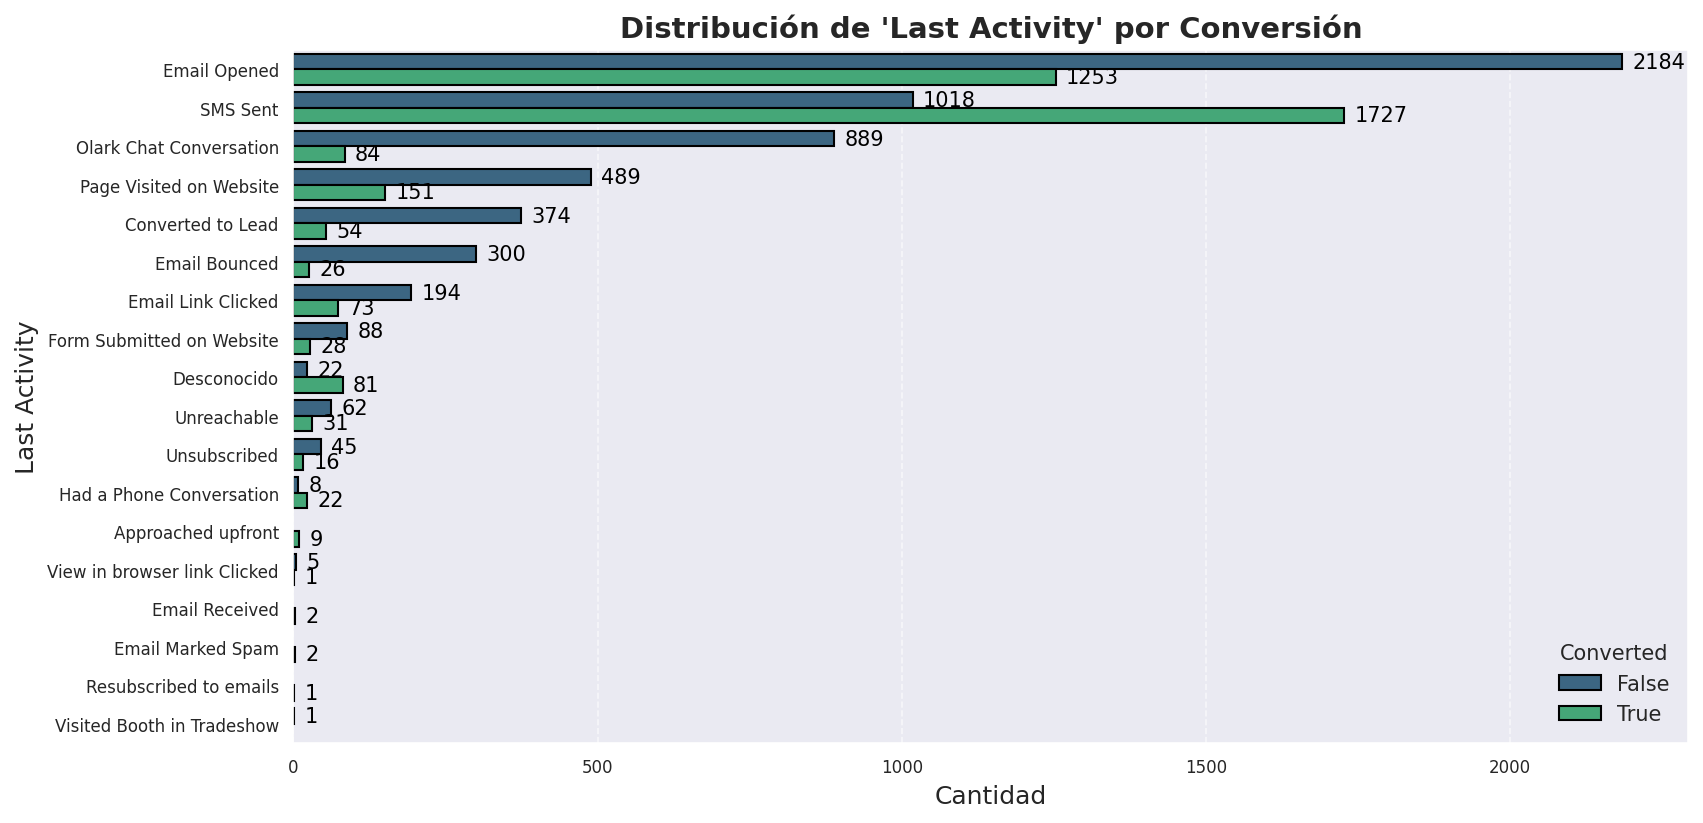

In [422]:
# An√°lisis Exploratorio de una Variable: Last Activity
conteo_de_convertidos('Last Activity')

üî• La actividad con la mayor tasa de conversi√≥n es, sin duda, el **Env√≠o de SMS**.  
   ‚û°Ô∏è Esto podr√≠a indicar que los mensajes de texto son altamente efectivos en la conversi√≥n de leads. üì≤‚úÖ  

ü§î Sin embargo, es necesario un an√°lisis m√°s profundo:  
   üîπ ¬øEs realmente la efectividad del SMS lo que impulsa la conversi√≥n?  
   üîπ ¬øO simplemente ocurre en una etapa avanzada del proceso, cuando el lead ya est√° listo para convertirse?  
üîé

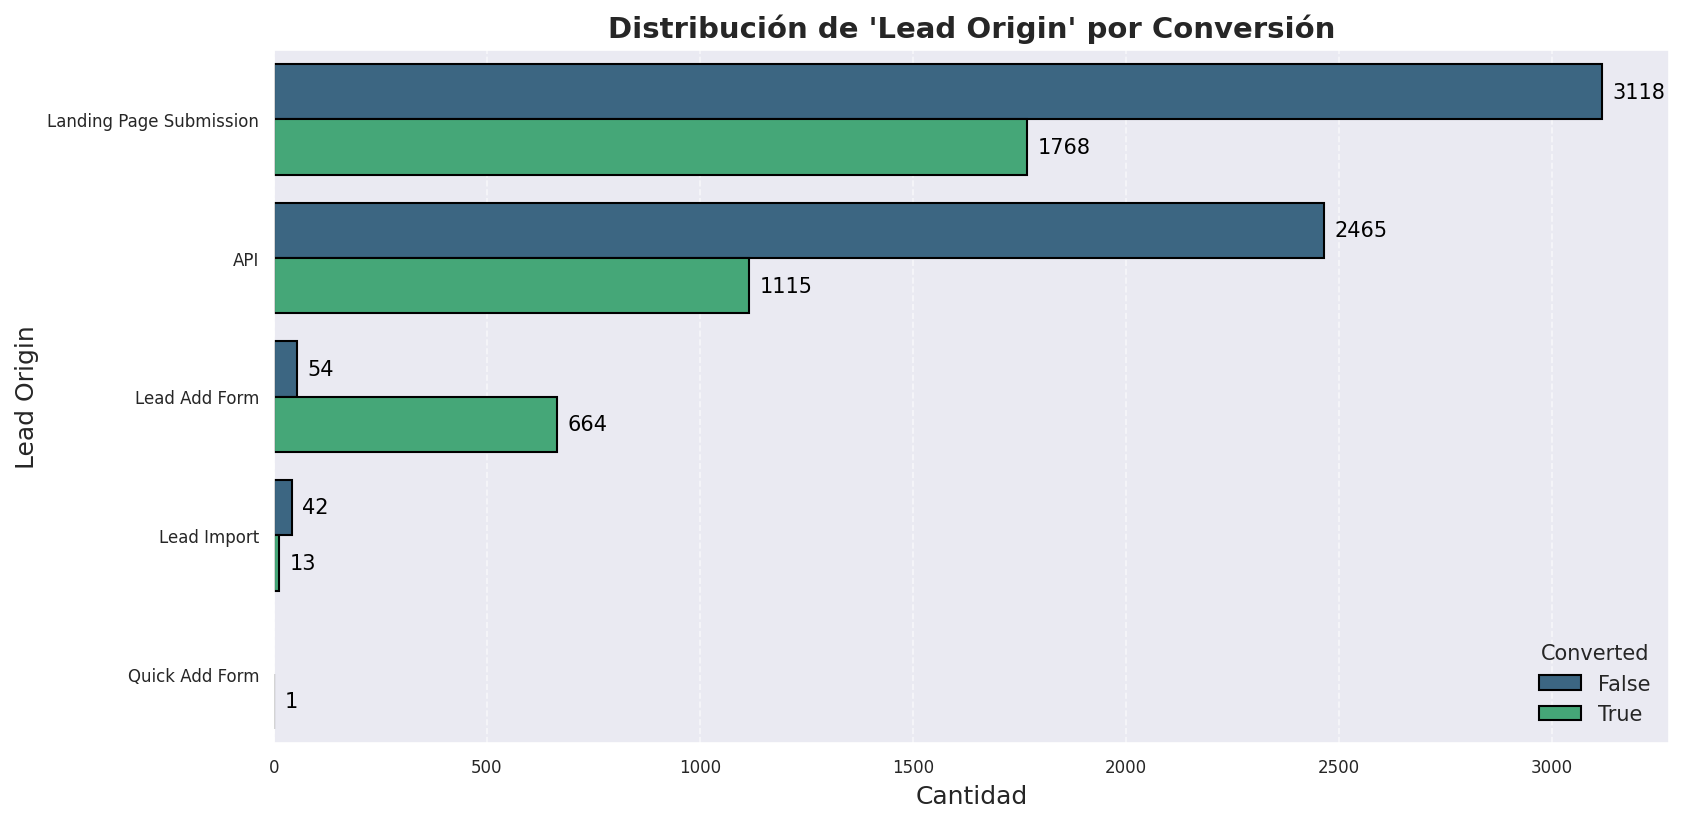

In [423]:
# An√°lisis Exploratorio de una Variable: Lead Origin
conteo_de_convertidos('Lead Origin')

üìå **Hallazgos Clave:**
   ‚úÖ Los prospectos que ingresan a trav√©s del formulario **'A√±adir Prospecto'** tienen una tasa de conversi√≥n significativamente m√°s alta. ‚úçÔ∏èüéØ  
   ‚û°Ô∏è Esto sugiere que los leads captados manualmente pueden estar m√°s calificados o ser m√°s propensos a avanzar en el embudo.  

üìä **Comparaci√≥n entre otros canales:**
   üîπ La tasa de conversi√≥n de los prospectos originados en **'Env√≠o de P√°gina de Aterrizaje'** parece ser **ligeramente mayor** que la de aquellos que provienen de **'API'**.  
   üîπ Esto podr√≠a indicar que los leads generados mediante interacci√≥n directa (landing page) est√°n m√°s interesados que aquellos captados autom√°ticamente a trav√©s de integraciones externas.  


# An√°lisis Exploratorio de las Variables Booleanas

In [424]:
# Creamos la funci√≥n matriz_de_confusion para graficar el mapa de calor de la matriz de confusi√≥n de una caracter√≠stica
# booleana versus Convertidos y agregar etiquetas relevantes. Ser√° de mucha utilidad para las variables booleanas.

In [425]:
# Ahora crearemos  la funci√≥n matriz_de_confusion para graficar el mapa de calor de la matriz de confusi√≥n de una caracter√≠stica
def matriz_de_confusion(independiente, dependiente='Converted'):

    mdc = confusion_matrix(df[dependiente], df[independiente])


    etiquetas_x = df[dependiente].unique()
    etiquetas_y = df[independiente].unique()


    plt.figure(figsize=(10, 5), dpi=150)
    sns.heatmap(mdc, annot=True, fmt='d', xticklabels=etiquetas_x, yticklabels=etiquetas_y, cmap='Purples', linewidths=0.5, linecolor='black')


    plt.title(f"Matriz de Confusi√≥n: {independiente} vs. {dependiente}", fontsize=12, fontweight='bold', color='black')
    plt.xlabel(dependiente, fontsize=10, color='black')
    plt.ylabel(independiente, fontsize=10, color='black')
    plt.xticks(fontsize=9, color='black')
    plt.yticks(fontsize=9, color='black')


    plt.show()

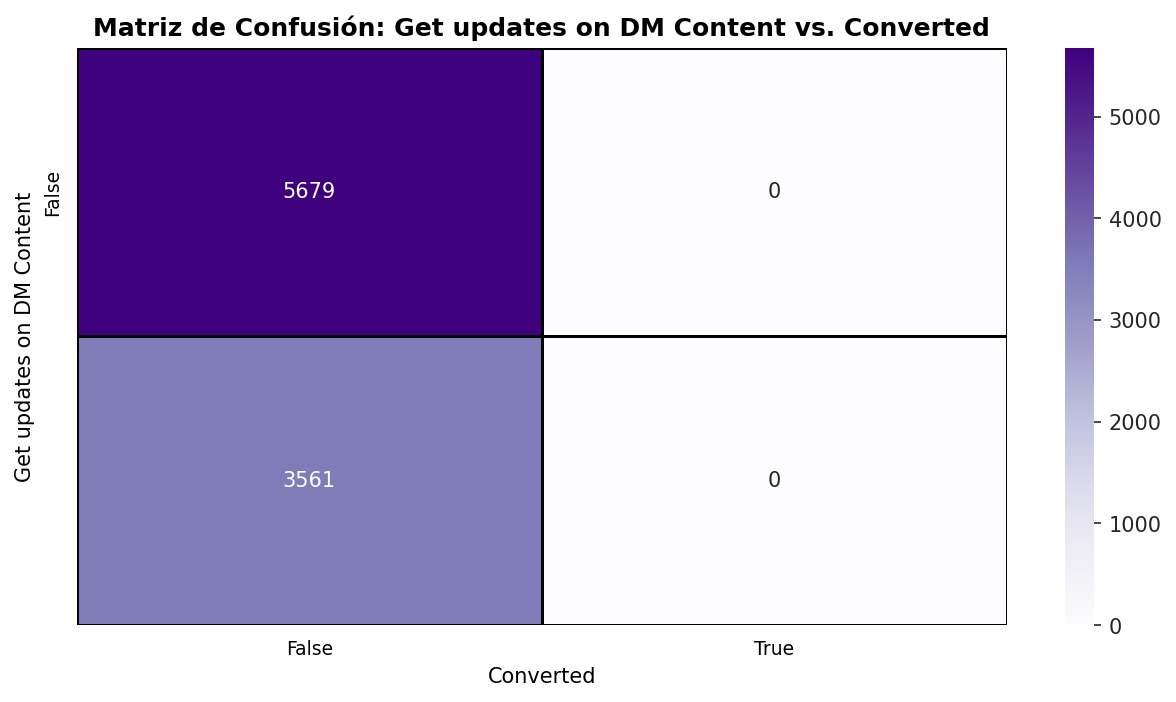

In [426]:
# Matriz de Confusi√≥n de 'Get updates on DM Content' vs. 'Converted'
matriz_de_confusion('Get updates on DM Content')

Curiosamente, ning√∫n prospecto mostr√≥ inter√©s en recibir actualizaciones sobre contenido de Marketing Directo (DM).
Esto sugiere que este tipo de contenido no es relevante para la audiencia objetivo.

Dado que tanto los prospectos convertidos como los no convertidos ignoraron esta opci√≥n,
invertir recursos en esta estrategia podr√≠a no ser eficiente.

üìå Posible acci√≥n: En lugar de insistir con DM, podr√≠amos analizar qu√© otros canales o contenidos
generan m√°s interacci√≥n y centrarnos en optimizar esas estrategias.

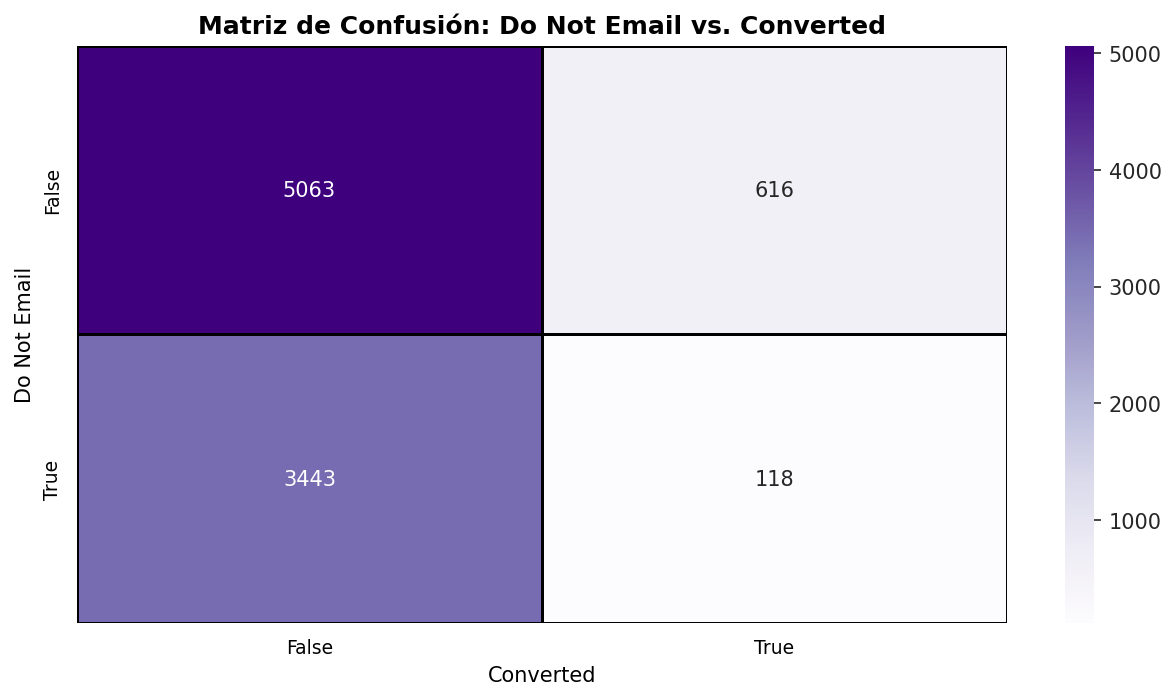

In [427]:
# Matriz de Confusi√≥n de 'Do Not Email' vs. 'Converted'
matriz_de_confusion('Do Not Email')

üì¨ **Preferencias de Contacto y Conversi√≥n**  

üîπ **Correo Electr√≥nico**  
La gran mayor√≠a de los prospectos est√°n abiertos a recibir correos electr√≥nicos, lo que le da al equipo de ventas
una v√≠a efectiva para contactarlos. Sin embargo, un peque√±o porcentaje (7.94%) opta por no recibir correos electr√≥nicos,
y su tasa de conversi√≥n es significativamente baja (16.08%). Esto indica que estos prospectos ya muestran
un menor inter√©s desde el inicio.  

üìû **Llamadas Telef√≥nicas**  
Entre los prospectos que no bloquearon las llamadas, la tasa de conversi√≥n es del **40.47%**, lo que sugiere que
el contacto telef√≥nico es una estrategia efectiva para cerrar inscripcione

# An√°lisis Exploratorio de Variables Num√©ricas

In [428]:
# Definamos la funci√≥n de gr√°fico de caja y bigote

def grafico_de_caja(independiente, dependiente='Converted'):
    plt.figure(figsize=(10, 5), dpi=150)


    df[dependiente] = df[dependiente].astype(int)


    colores = {0: "#7B68EE", 1: "#4B0082"}

    sns.boxplot(
        x=df[dependiente],
        y=df[independiente],
        data=df,
        hue=df[dependiente],
        palette=colores
    )

    plt.title(f"Gr√°fico de Caja de {independiente} por {dependiente}", fontsize=12, color="black")
    plt.xlabel(dependiente, fontsize=10, color="black")
    plt.ylabel(independiente, fontsize=10, color="black")
    plt.legend(title=dependiente,loc="upper right")

    plt.show()

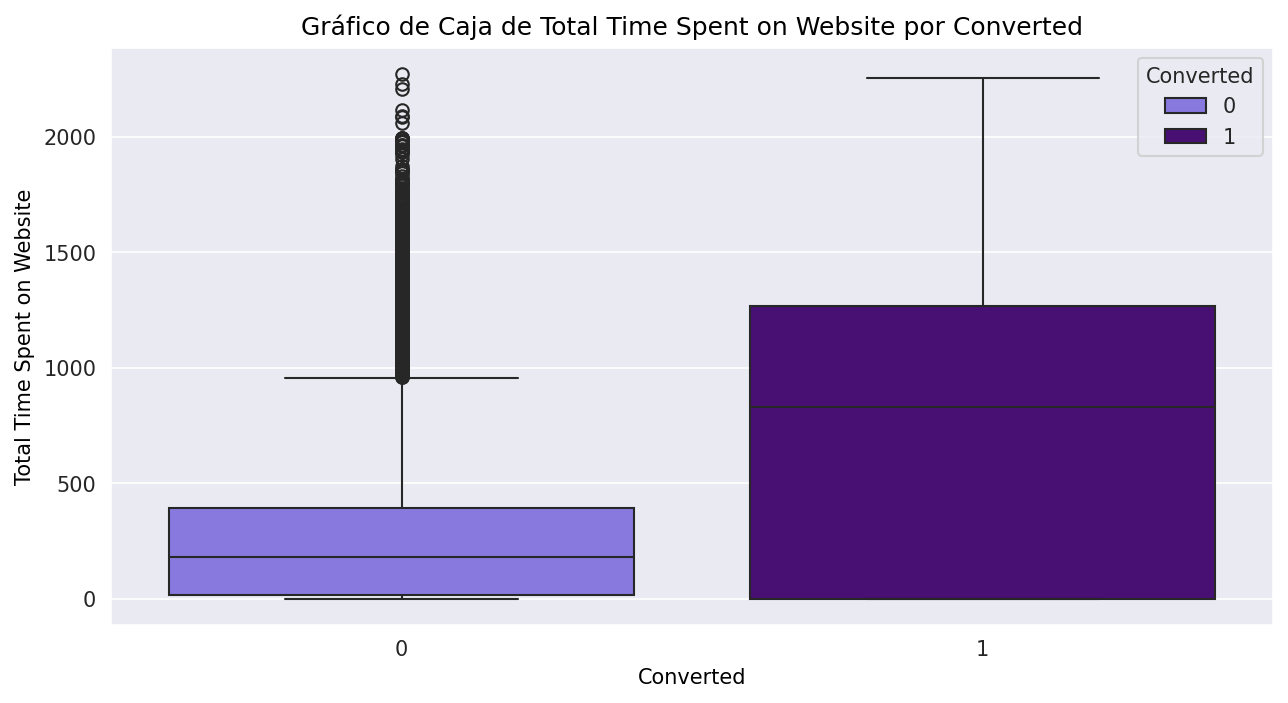

In [429]:
# Gr√°fico de Caja de 'Total Time Spent on Website'
grafico_de_caja('Total Time Spent on Website')

üìä Los prospectos que se convierten pasan **mucho m√°s tiempo** en el sitio web en comparaci√≥n con los que no se convierten.  
   - Su **Rango Intercuart√≠lico (IQR)** es significativamente mayor.

üéØ **Estrategia de Conversi√≥n:**  
   - **Incentivar** a los prospectos a permanecer m√°s tiempo en el sitio podr√≠a **aumentar la tasa de conversi√≥n**.  
   - üí° Un enfoque interesante ser√≠a **analizar a los leads** que pasaron un tiempo considerable en la web pero **no compraron**.  
     - Esto sugiere que est√°n interesados, pero quiz√°s necesiten un **impulso extra** para cerrar la venta.  


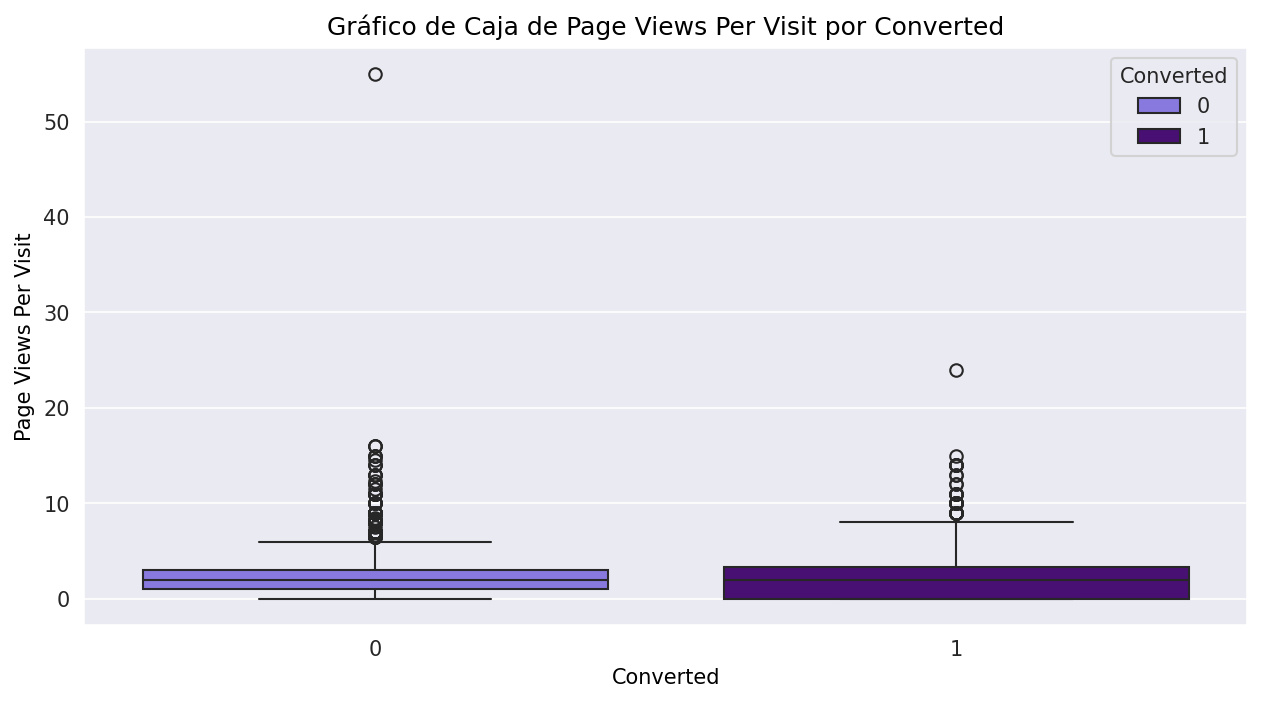

In [430]:
# Gr√°fico de Caja de 'Page Views Per Visit'
grafico_de_caja('Page Views Per Visit')

üìä **Hallazgos clave:**  
   - Todas las oportunidades de venta **ven un n√∫mero similar de p√°ginas por visita en promedio**, sin importar si se convierten o no.  
   - Sin embargo, el **Rango Intercuart√≠lico (IQR) es mayor** para los prospectos que se convierten.  

‚ùó **Curiosidad en los datos:**  
   - Un grupo significativo de oportunidades convertidas tiene **0 vistas de p√°gina por visita en promedio**.  
   - üîé El caso extremo de un usuario con **55 p√°ginas por visita** podr√≠a no ser un prospecto real.  
     - üìå Posibles explicaciones:  
       - **Un competidor analizando la web**.  
       - **Un miembro del equipo revisando el sitio internamente**.

In [431]:
# Gr√°fico de Caja de 'TotalVisits'

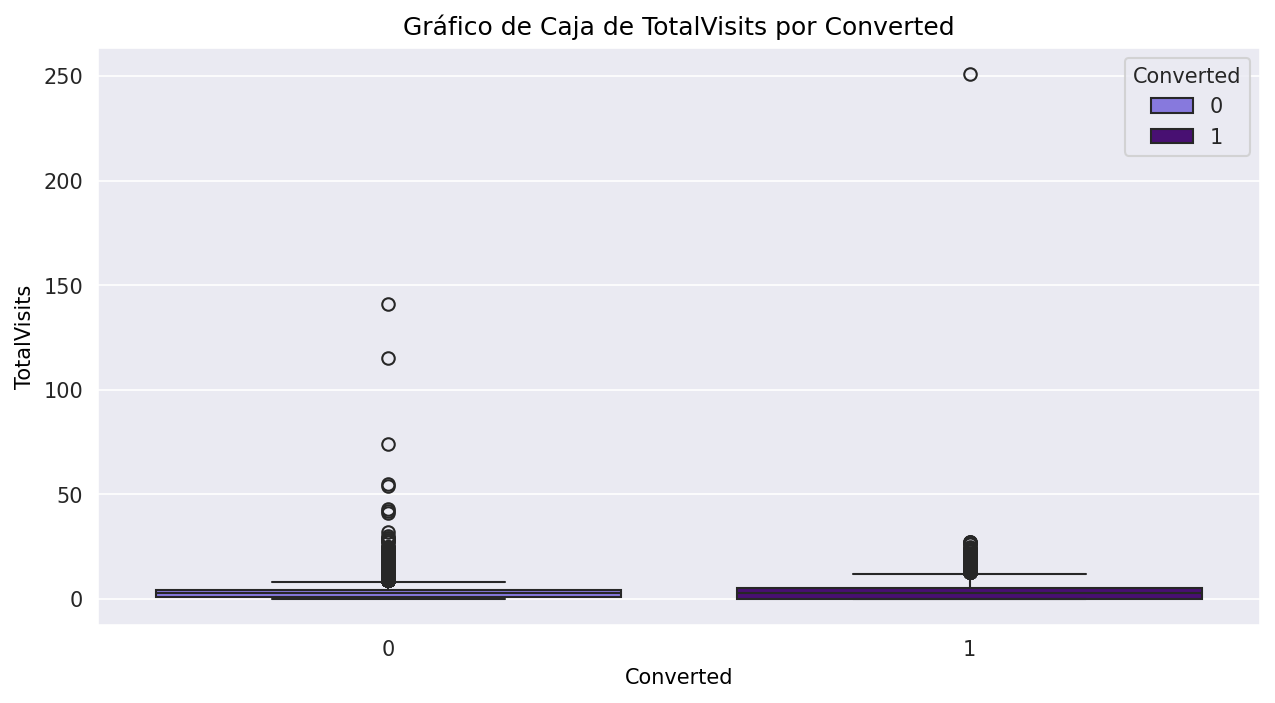

In [432]:
# Gr√°fico de Caja de 'TotalVisits'
grafico_de_caja('TotalVisits')

In [433]:
# No es posible interpretarlo por la dispersi√≥n de los outliers. Removamos los leads con mas de 30 Visitas al sitio web

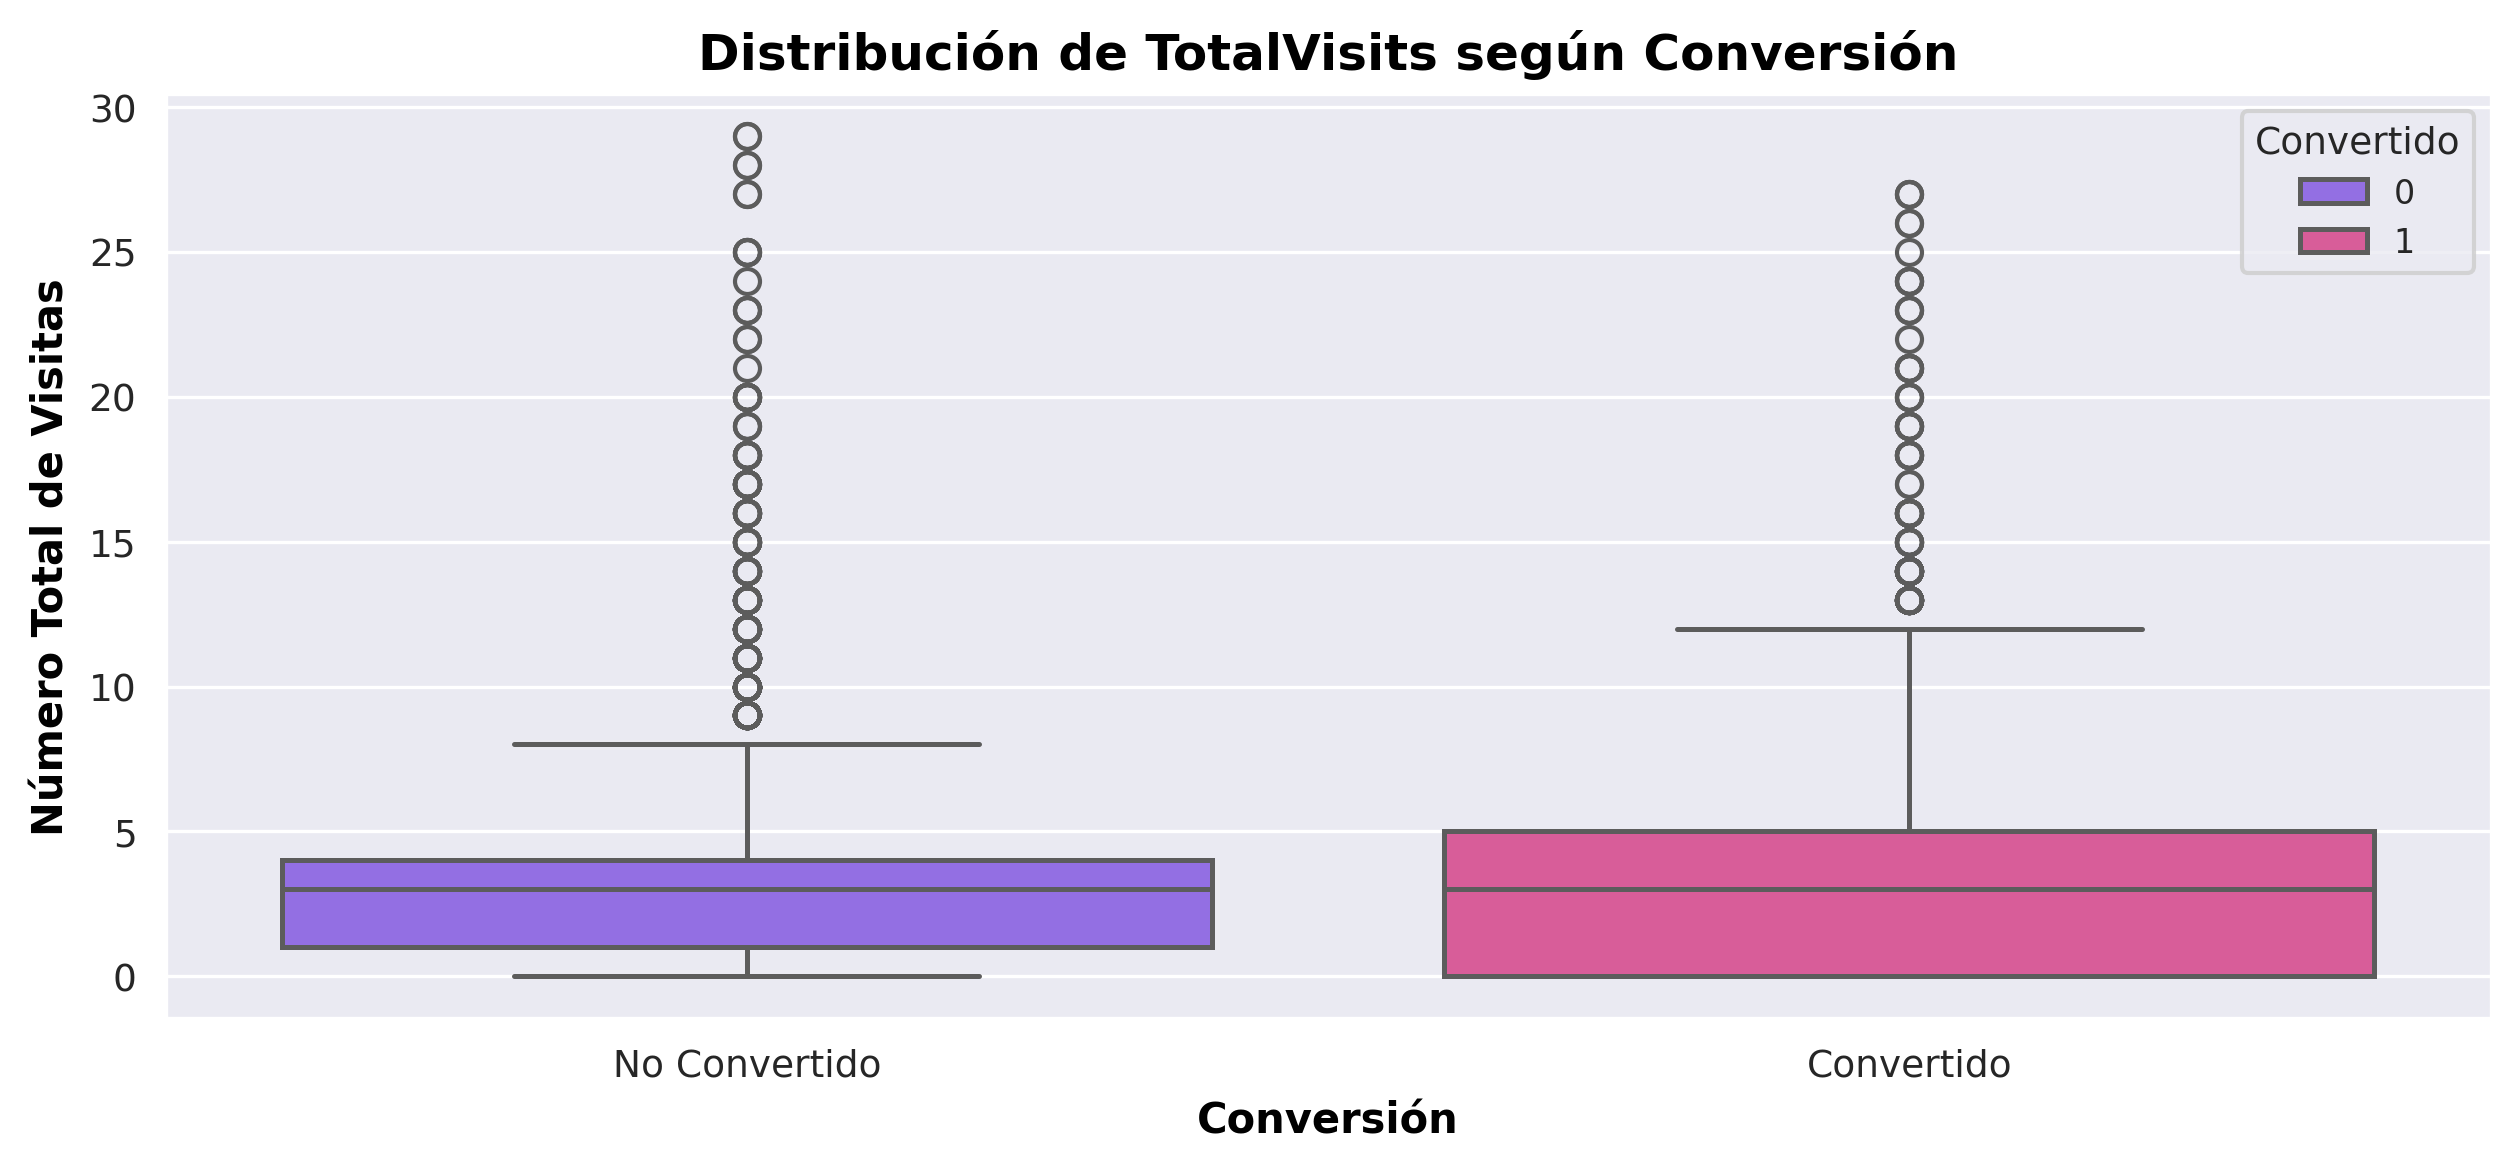

In [434]:
plt.figure(figsize=(10, 4), dpi=300)
sns.boxplot(
    data=df[df['TotalVisits'] < 30],
    x='Converted',
    y='TotalVisits',
    hue='Converted',
    palette={0: "#8B5CF6", 1: "#EC4899"},  # Morado oscuro para No, rosa para S√≠
    linewidth=1.2
)

plt.title("Distribuci√≥n de TotalVisits seg√∫n Conversi√≥n", fontsize=12, fontweight='bold', color="black")
plt.xlabel("Conversi√≥n", fontsize=10, fontweight='bold', color="black")
plt.ylabel("N√∫mero Total de Visitas", fontsize=10, fontweight='bold', color="black")
plt.xticks(ticks=[0, 1], labels=["No Convertido", "Convertido"], fontsize=9)
plt.yticks(fontsize=9)
plt.legend(title="Convertido", title_fontsize=9, fontsize=8)
plt.show()


Adem√°s de visitar el sitio web con m√°s frecuencia, los leads de venta que se convierten parecen mostrar una mayor dispersi√≥n y Rango Intercuart√≠lico (IQR) que los leads que no se convierten.

# Desarrollo del Modelo de Regresi√≥n Log√≠stica

üìå **Desarrollo del Modelo de Regresi√≥n Log√≠stica**

En esta etapa, construiremos un modelo de regresi√≥n log√≠stica para predecir la conversi√≥n de prospectos.

üîπ **Paso 1: Identificar las variables**
    - La variable dependiente es `Converted` (1: convertido, 0: no convertido).
    - Las variables independientes incluyen todas las dem√°s columnas del DataFrame.

üîπ **Paso 2: Convertir variables categ√≥ricas en dummies**
    - Como la regresi√≥n log√≠stica solo trabaja con variables num√©ricas, transformaremos las variables categ√≥ricas en variables dummies.

üîπ **Paso 3: Dividir los datos en entrenamiento y prueba**
    - Usaremos una proporci√≥n de 80%-20% para entrenar y evaluar el modelo.

üîπ **Paso 4: Ajustar el modelo**
    - Entrenaremos el modelo de regresi√≥n log√≠stica con los datos transformados.
    - Evaluaremos su desempe√±o con m√©tricas como precisi√≥n, recall, F1-score y matriz de confusi√≥n.

üîπ **Paso 5: Interpretar los coeficientes**
    - Analizaremos c√≥mo cada variable afecta la probabilidad de conversi√≥n.
    - Esto nos permitir√° tomar decisiones estrat√©gicas para mejorar las tasas de conversi√≥n.

üìå ¬°Manos a la obra! üöÄ

In [435]:
# Botamos la variable dependiente y generamos las dummies de las categ√≥ricas
df['Converted'] = df['Converted'].astype(bool)
X = pd.get_dummies(df.drop(columns='Converted', axis=1))
X.head()


Do Not Email  Do Not Call  TotalVisits  \
Lead Number                                           
660737              False        False          0.0   
660728              False        False          5.0   
660727              False        False          2.0   
660719              False        False          1.0   
660681              False        False          2.0   

             Total Time Spent on Website  Page Views Per Visit  Search  \
Lead Number                                                              
660737                                 0                   0.0   False   
660728                               674                   2.5   False   
660727                              1532                   2.0   False   
660719                               305                   1.0   False   
660681                              1428                   1.0   False   

             Magazine  Newspaper Article  X Education Forums  Newspaper  ...  \
Lead Number                                                              ...   
660737          False              False               False      False  ...   
660728          False              False               False      False  ...   
660727          False              False               False      False  ...   
660719          False              False               False      False  ...   
660681          False              False               False      False  ...   

             Last Notable Activity_Form Submitted on Website  \
Lead Number                                                    
660737                                                 False   
660728                                                 False   
660727                                                 False   
660719                                                 False   
660681                                                 False   

             Last Notable Activity_Had a Phone Conversation  \
Lead Number                                                   
660737                                                False   
660728                                                False   
660727                                                False   
660719                                                False   
660681                                                False   

             Last Notable Activity_Modified  \
Lead Number                                   
660737                                 True   
660728                                False   
660727                                False   
660719                                 True   
660681                                 True   

             Last Notable Activity_Olark Chat Conversation  \
Lead Number                                                  
660737                                               False   
660728                                               False   
660727                                               False   
660719                                               False   
660681                                               False   

             Last Notable Activity_Page Visited on Website  \
Lead Number                                                  
660737                                               False   
660728                                               False   
660727                                               False   
660719                                               False   
660681                                               False   

             Last Notable Activity_Resubscribed to emails  \
Lead Number                                                 
660737                                              False   
660728                                              False   
660727                                              False   
660719                                              False   
660681                                              False   

             Last Notable Ac

In [436]:
Y = df['Converted']

Luego, dividimos nuestros datos en un conjunto de entrenamiento y un conjunto de prueba (el 80% de los datos se utilizar√°n para el conjunto de entrenamiento, mientras que el 20% restante se utilizar√° en el conjunto de prueba).

In [437]:
X_entrenamiento, X_evaluacion, Y_entrenamiento, Y_evaluacion = train_test_split(X, Y, test_size = 0.2,
                                                                               random_state = 99, stratify = Y)

El par√°metro stratify = Y en train_test_split asegura que la proporci√≥n de clases en los conjuntos de entrenamiento y evaluaci√≥n sea la misma que la proporci√≥n de clases en el conjunto de datos original Y. Esto es crucial para mantener una distribuci√≥n representativa y equilibrada de las clases, especialmente en casos de desequilibrio significativo entre ellas.

üìè **Ajuste de Escala de las Variables** üìè

El escalado de variables es un paso crucial en el modelado de clasificaci√≥n, ya que los predictores num√©ricos pueden tener magnitudes y escalas muy diferentes. Para garantizar que el modelo funcione de manera eficiente, aplicaremos t√©cnicas de normalizaci√≥n.

üîπ **Variables num√©ricas a escalar:**
    - `TotalVisits`
    - `Total Time Spent on Website`
    - `Page Views Per Visit`

üîπ **¬øPor qu√© es importante?**
    - Modelos como la regresi√≥n log√≠stica pueden verse afectados si las variables tienen escalas muy distintas.
    - T√©cnicas que dependen de medidas de distancia (como KNN o SVM) requieren datos bien escalados para un desempe√±o √≥ptimo.

üîπ **¬øQu√© t√©cnica usar?**
    - Si **los datos no siguen una distribuci√≥n normal**, aplicamos `MinMaxScaler()`.
      - Este m√©todo ajusta los valores dentro de un rango de 0 a 1, preservando la distribuci√≥n original de los datos.
    - Si **los datos siguen una distribuci√≥n normal**, usamos `StandardScaler()`.
      - Convierte los datos a una media de 0 y una desviaci√≥n est√°ndar de 1 (normalizaci√≥n Z).

üìå En nuestro caso, dado que las variables no siguen una distribuci√≥n normal, utilizaremos **MinMaxScaler** para asegurarnos de que todas las variables num√©ricas est√©n dentro de un mismo rango y mejorar la estabilidad del modelo. üöÄ

In [438]:
# Escalado de variables utilizando MixMaxScaler
var_escalar = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

In [439]:
# Creamos la instancia MinMaxScaler
escalar = MinMaxScaler()

In [440]:
# Transformamos las variables con MixMaxScaler
# Primero la base de entrenamiento
X_entrenamiento[var_escalar] = escalar.fit_transform(X_entrenamiento[var_escalar])
X_entrenamiento.head()

Do Not Email  Do Not Call  TotalVisits  \
Lead Number                                           
627877              False        False     0.015936   
585642              False        False     0.015936   
617566              False        False     0.023904   
655639              False        False     0.015936   
593227              False        False     0.003984   

             Total Time Spent on Website  Page Views Per Visit  Search  \
Lead Number                                                              
627877                          0.672975              0.072727   False   
585642                          0.079225              0.036364   False   
617566                          0.453345              0.054545   False   
655639                          0.001320              0.072727   False   
593227                          0.210387              0.018182   False   

             Magazine  Newspaper Article  X Education Forums  Newspaper  ...  \
Lead Number                                                              ...   
627877          False              False               False      False  ...   
585642          False              False               False      False  ...   
617566          False              False               False      False  ...   
655639          False              False               False      False  ...   
593227          False              False               False      False  ...   

             Last Notable Activity_Form Submitted on Website  \
Lead Number                                                    
627877                                                 False   
585642                                                 False   
617566                                                 False   
655639                                                 False   
593227                                                 False   

             Last Notable Activity_Had a Phone Conversation  \
Lead Number                                                   
627877                                                False   
585642                                                False   
617566                                                False   
655639                                                False   
593227                                                False   

             Last Notable Activity_Modified  \
Lead Number                                   
627877                                False   
585642                                 True   
617566                                 True   
655639                                False   
593227                                 True   

             Last Notable Activity_Olark Chat Conversation  \
Lead Number                                                  
627877                                               False   
585642                                               False   
617566                                               False   
655639                                               False   
593227                                               False   

             Last Notable Activity_Page Visited on Website  \
Lead Number                                                  
627877                                               False   
585642                                               False   
617566                                               False   
655639                                               False   
593227                                               False   

             Last Notable Activity_Resubscribed to emails  \
Lead Number                                                 
627877                                              False   
585642                                              False   
617566                                              False   
655639                                              False   
593227                                              False   

             Last Notable Ac

Y ahora la base de evaluaci√≥n:
En el escalado de datos, utilizamos fit_transform en el conjunto de entrenamiento para calcular los par√°metros de escalado (como m√≠nimo y m√°ximo) y luego aplicar la transformaci√≥n. En cambio, para el conjunto de evaluaci√≥n, solo usamos transform para aplicar los mismos par√°metros ya calculados, asegurando as√≠ la coherencia y evitando el sesgo en nuestro modelo.

In [441]:
X_evaluacion[var_escalar] = escalar.transform(X_evaluacion[var_escalar])
X_evaluacion.head()

Do Not Email  Do Not Call  TotalVisits  \
Lead Number                                           
591899              False        False     0.015936   
604007              False        False     0.019920   
653773              False        False     0.011952   
611519              False        False     0.015936   
584568              False        False     0.007968   

             Total Time Spent on Website  Page Views Per Visit  Search  \
Lead Number                                                              
591899                          0.173856              0.024182   False   
604007                          0.412852              0.090909   False   
653773                          0.111356              0.054545   False   
611519                          0.699384              0.072727   False   
584568                          0.014525              0.036364   False   

             Magazine  Newspaper Article  X Education Forums  Newspaper  ...  \
Lead Number                                                              ...   
591899          False              False               False      False  ...   
604007          False              False               False      False  ...   
653773          False              False               False      False  ...   
611519          False              False               False      False  ...   
584568          False              False               False      False  ...   

             Last Notable Activity_Form Submitted on Website  \
Lead Number                                                    
591899                                                 False   
604007                                                 False   
653773                                                 False   
611519                                                 False   
584568                                                 False   

             Last Notable Activity_Had a Phone Conversation  \
Lead Number                                                   
591899                                                False   
604007                                                False   
653773                                                False   
611519                                                False   
584568                                                False   

             Last Notable Activity_Modified  \
Lead Number                                   
591899                                False   
604007                                False   
653773                                False   
611519                                 True   
584568                                False   

             Last Notable Activity_Olark Chat Conversation  \
Lead Number                                                  
591899                                               False   
604007                                               False   
653773                                               False   
611519                                               False   
584568                                               False   

             Last Notable Activity_Page Visited on Website  \
Lead Number                                                  
591899                                               False   
604007                                               False   
653773                                               False   
611519                                               False   
584568                                               False   

             Last Notable Activity_Resubscribed to emails  \
Lead Number                                                 
591899                                              False   
604007                                              False   
653773                                              False   
611519                                              False   
584568                                              False   

             Last Notable Ac

üöÄ **Escalado de Datos con MinMaxScaler: ¬øAntes o Despu√©s de la Divisi√≥n?** üöÄ

üìå **Regla de oro:** Siempre dividir el conjunto de datos en entrenamiento y evaluaci√≥n antes de escalar.

üîπ **¬øPor qu√©?**  
    - Si escalamos antes de dividir, el `MinMaxScaler` utilizar√° toda la distribuci√≥n de los datos, incluyendo el conjunto de prueba.  
    - Esto genera **fuga de datos**, es decir, el modelo "ve" informaci√≥n del conjunto de evaluaci√≥n antes de la prueba.  
    - Como resultado, la evaluaci√≥n del modelo ser√° **optimista e irreal**, lo que puede llevar a errores en la validaci√≥n.

üîπ **Mejor pr√°ctica:**  
    - Primero, dividir los datos en entrenamiento y prueba (`train_test_split`).
    - Luego, aplicar `MinMaxScaler` solo sobre el conjunto de entrenamiento.
    - Finalmente, usar el mismo escalador para transformar el conjunto de prueba.

üìå **Beneficio clave:**  
Este enfoque asegura que la evaluaci√≥n del modelo refleje su verdadero desempe√±o en datos no vistos, evitando sesgos en la validaci√≥n. ‚úÖ  

In [442]:
# Creamos el modelo de regresi√≥n log√≠stica
modelo_rl = LogisticRegression()

In [443]:
# Entrenamos el modelo con los datos de entrenamiento
modelo_rl = LogisticRegression(solver='saga', max_iter=500)
modelo_rl.fit(X_entrenamiento, Y_entrenamiento)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, solver='saga')

In [444]:
# Predecimos las probabilidades en el conjunto de evaluaci√≥n
Y_prediccion = modelo_rl.predict_proba(X_evaluacion)[:, 1]


üìå Interpretaci√≥n de modelo_rl.predict_proba(X_evaluacion)[:, 1]

La funci√≥n predict_proba de un modelo de regresi√≥n log√≠stica devuelve un array con dos columnas:
- La primera columna representa la probabilidad de que la observaci√≥n pertenezca a la clase 0.
- La segunda columna representa la probabilidad de que la observaci√≥n pertenezca a la clase 1.

Al seleccionar [:, 1], obtenemos √∫nicamente la probabilidad de que cada observaci√≥n pertenezca a la clase positiva ('Converted').
Esto nos permite evaluar el nivel de confianza del modelo en sus predicciones y ajustar umbrales de decisi√≥n personalizados.

In [445]:
Y_prediccion

array([0.35853212, 0.90530864, 0.07131187, ..., 0.12378772, 0.98442881,
       0.05309045])

# AUC y ROC

üîç **Curva ROC y Funci√≥n roc_curve**

La funci√≥n `roc_curve` de la biblioteca `sklearn.metrics` genera m√∫ltiples puntos de corte (umbrales) y calcula dos m√©tricas fundamentales para cada uno de ellos:
  
   - **Tasa de Verdaderos Positivos (TPR)**: La proporci√≥n de casos positivos correctamente identificados.
   - **Tasa de Falsos Positivos (FPR)**: La proporci√≥n de casos negativos que fueron incorrectamente clasificados como positivos.

La curva ROC es una representaci√≥n gr√°fica que traza TPR versus FPR para todos estos umbrales, ofreciendo una visi√≥n integral de la capacidad del modelo para distinguir entre las clases a trav√©s de diferentes puntos de corte.

Al ejecutar `roc_curve` utilizando las etiquetas verdaderas y las probabilidades de predicci√≥n, se generan tres arrays:
  
   - **fpr**: Los valores de la Tasa de Falsos Positivos.
   - **tpr**: Los valores de la Tasa de Verdaderos Positivos.
   - **puntos_de_corte**: Los umbrales de decisi√≥n correspondientes.

Estos arrays son esenciales para calcular el **AUC (√Årea Bajo la Curva)**, que resume en un solo n√∫mero la capacidad discriminativa del modelo.

¬°Esta es la base para evaluar y ajustar nuestro modelo de manera efectiva!

In [446]:
fpr, tpr, puntos_de_corte= roc_curve(Y_evaluacion, Y_prediccion)

# Calcular el √°rea bajo la curva (AUC)
AUC (√Årea Bajo la Curva): Es el √°rea bajo la curva ROC. Este valor cuantifica qu√© tan bueno es el modelo para distinguir entre las clases. Un AUC de 1 significa un modelo perfecto, mientras que un AUC de 0.5 significa un modelo no mejor que un lanzamiento de moneda al azar.

In [447]:
auc_rl = auc(fpr, tpr)
auc_rl

0.921377368847919

La **Curva ROC** es una herramienta gr√°fica que permite evaluar el rendimiento de un modelo de clasificaci√≥n en distintos umbrales de decisi√≥n. Se construye trazando dos m√©tricas clave:

   - **Tasa de Verdaderos Positivos (Sensibilidad o Recall)**: Proporci√≥n de casos positivos correctamente identificados.
   - **Tasa de Falsos Positivos (1 - Especificidad)**: Proporci√≥n de casos negativos clasificados err√≥neamente como positivos.

üîπ **¬øC√≥mo funciona la Curva ROC?**  
La idea central es analizar c√≥mo var√≠an estas tasas cuando ajustamos el umbral de clasificaci√≥n. Si el umbral es muy bajo, el modelo predice m√°s positivos (mayor sensibilidad, pero m√°s falsos positivos). Si es alto, el modelo se vuelve m√°s estricto (menos falsos positivos, pero tambi√©n menos verdaderos positivos).  

üîπ **¬øPor qu√© es √∫til?**  
La Curva ROC permite visualizar el **trade-off** entre sensibilidad y especificidad, ayudando a seleccionar el umbral m√°s adecuado seg√∫n el problema. Adem√°s, el **√Årea Bajo la Curva (AUC)** proporciona una m√©trica resumen del desempe√±o general del modelo:

   - **AUC cercano a 1**: Modelo con alta capacidad de discriminaci√≥n.
   - **AUC alrededor de 0.5**: Modelo que no distingue mejor que el azar.
   - **AUC bajo**: Modelo con pobre desempe√±o.

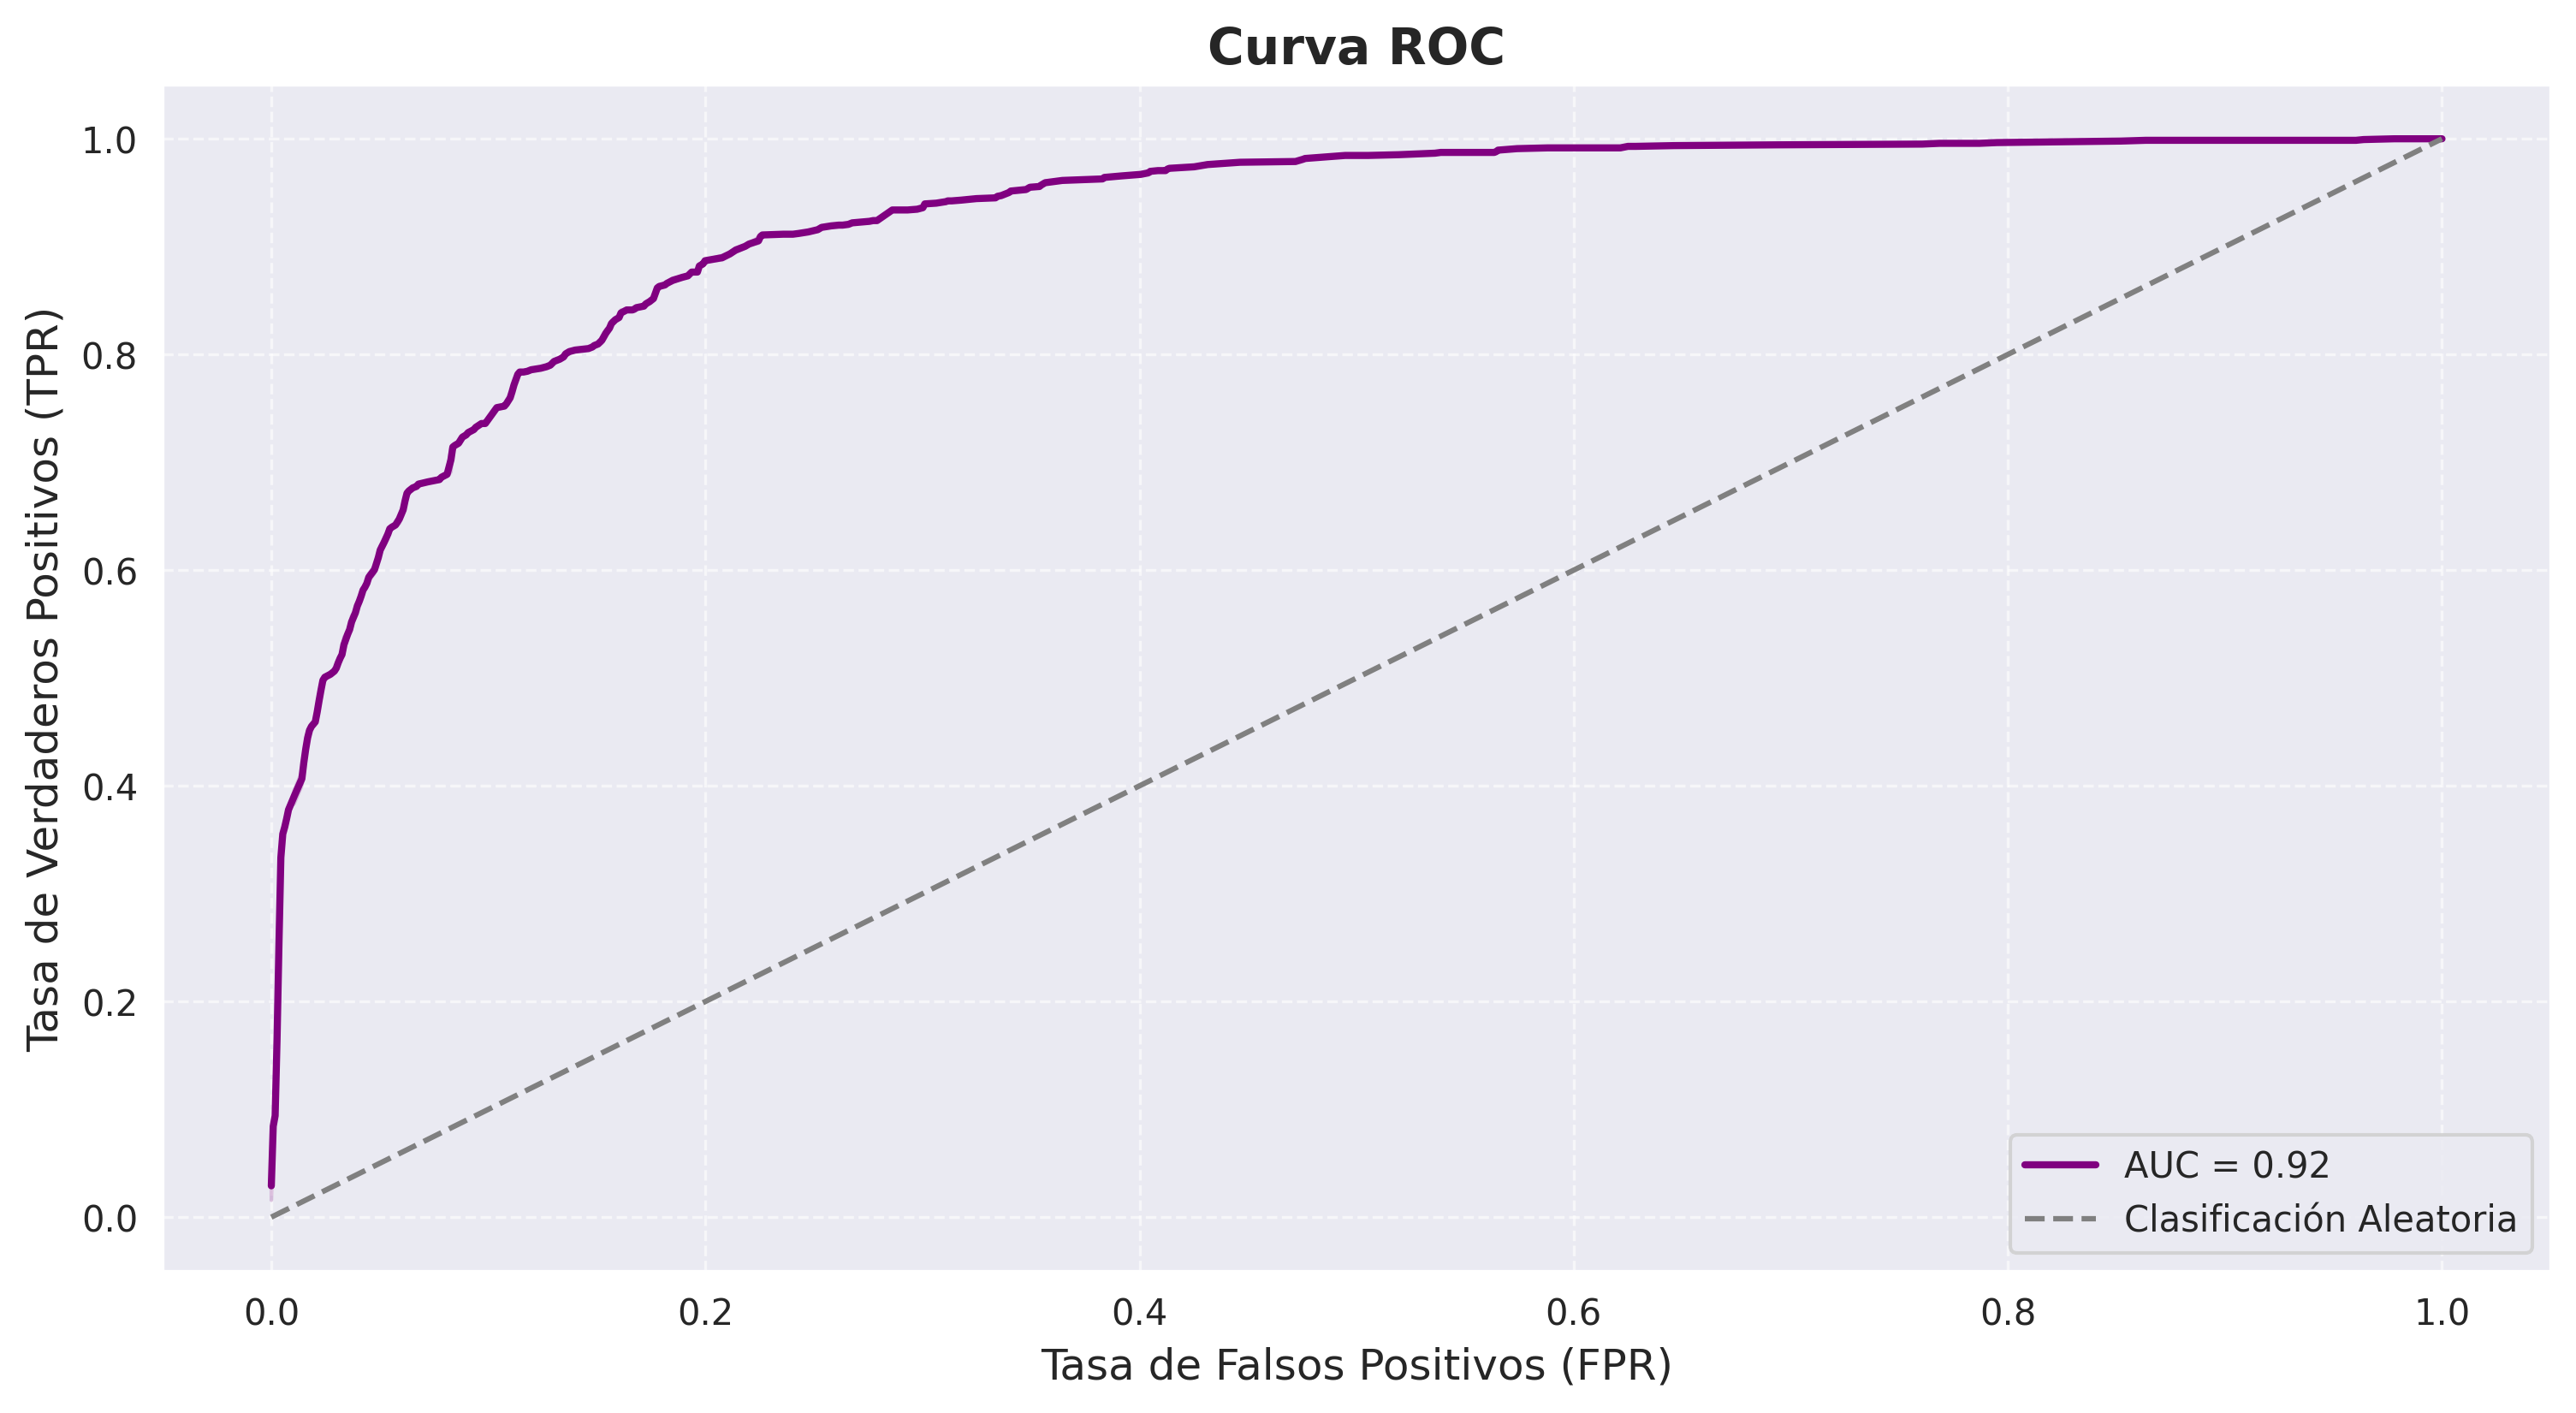

In [448]:
#Graficamos nuestra curva ROC
plt.figure(figsize=(12, 6), dpi=300)
sns.lineplot(x=fpr, y=tpr, label=f'AUC = {auc_rl:.2f}', color='purple', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5, label="Clasificaci√≥n Aleatoria")
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

üîç **Interpretaci√≥n del AUC (√Årea Bajo la Curva ROC)**

‚úÖ El modelo ha obtenido un **AUC de 0.92**, lo que indica un **alto rendimiento** en la clasificaci√≥n.  
üìä Esto significa que hay un **92% de probabilidad** de que el modelo asigne una puntuaci√≥n m√°s alta  
a una observaci√≥n positiva en comparaci√≥n con una negativa.  

üí° **¬øPor qu√© es importante el AUC?**  
- Un AUC alto refleja **una buena capacidad de discriminaci√≥n** entre clases.  
- Un valor de **0.5** indica que el modelo no es mejor que una clasificaci√≥n aleatoria.  
- Un valor cercano a **1** sugiere un modelo casi perfecto en la diferenciaci√≥n de clases.  

‚ö†Ô∏è **Consideraciones adicionales**  
Aunque un AUC elevado es una se√±al positiva, **no debe ser el √∫nico criterio de evaluaci√≥n**.  
Se recomienda analizar otros aspectos como:  
- **Interpretabilidad:** ¬øEs el modelo f√°cil de entender?  
- **Complejidad:** ¬øEl modelo es eficiente en t√©rminos de costo computacional?  
- **Objetivos del negocio:** ¬øEl modelo satisface las necesidades del problema real?  

üìù **Conclusi√≥n**  
Este AUC de **0.92** es **alentador** y demuestra una excelente capacidad de clasificaci√≥n.  
Sin embargo, para seleccionar el mejor modelo, es fundamental **comparar su desempe√±o**  
con otros modelos y evaluar m√©tricas adicionales seg√∫n el contexto del problema.

üîç **Estableciendo el Punto de Corte en la Regresi√≥n Log√≠stica**  

En modelos de clasificaci√≥n como la **Regresi√≥n Log√≠stica**, la salida es una **probabilidad**  
de pertenecer a la clase positiva (1). Sin embargo, para tomar decisiones, necesitamos definir  
un **punto de corte** (threshold) que determine cu√°ndo clasificar una observaci√≥n como 1 o 0.  

üìå **Concepto clave**  
- Si la probabilidad predicha es **mayor o igual al punto de corte**, clasificamos la observaci√≥n como **1**.  
- Si la probabilidad predicha es **menor al punto de corte**, la clasificamos como **0**.  
- El punto de corte por defecto suele ser **0.5**, pero puede ajustarse seg√∫n la necesidad del problema.  

üéØ **Importancia del Punto de Corte**  
- **Umbrales bajos** aumentan la sensibilidad (detecta m√°s positivos) pero pueden incrementar falsos positivos.  
- **Umbrales altos** aumentan la especificidad (menos falsos positivos) pero pueden perder verdaderos positivos.  

üí° **Estrategia**  
El punto de corte √≥ptimo se elige en funci√≥n de la m√©trica que se quiera priorizar,  
como **precisi√≥n, recall, F1-score o maximizaci√≥n del AUC-ROC**.

In [449]:
# Definimos los costos y beneficios
COSTO_FP = 50
BENEFICIO_TP = 100

In [450]:
#Lista donde almacenaremos
utilidades = []

In [451]:
# Evaluamos la utilidad en funci√≥n de distintos puntos de corte
for puntodecorte in puntos_de_corte:

    predicciones = (Y_prediccion >= puntodecorte).astype(int)


    vp = np.sum((predicciones == 1) & (Y_evaluacion == 1))
    fp = np.sum((predicciones == 1) & (Y_evaluacion == 0))


    utilidad = (vp * BENEFICIO_TP) - (fp * COSTO_FP)
    utilidades.append(utilidad)

In [452]:
# Determinamos el punto de corte √≥ptimo
indice_max_utilidad = np.argmax(utilidades)
punto_de_corte_optimo = puntos_de_corte[indice_max_utilidad]
utilidad_maxima = utilidades[indice_max_utilidad]
print(f"üìå Punto de corte √≥ptimo: {punto_de_corte_optimo:.3f}")
print(f"üí∞ Utilidad m√°xima alcanzada: {utilidad_maxima}")

üìå Punto de corte √≥ptimo: 0.268
üí∞ Utilidad m√°xima alcanzada: 52050


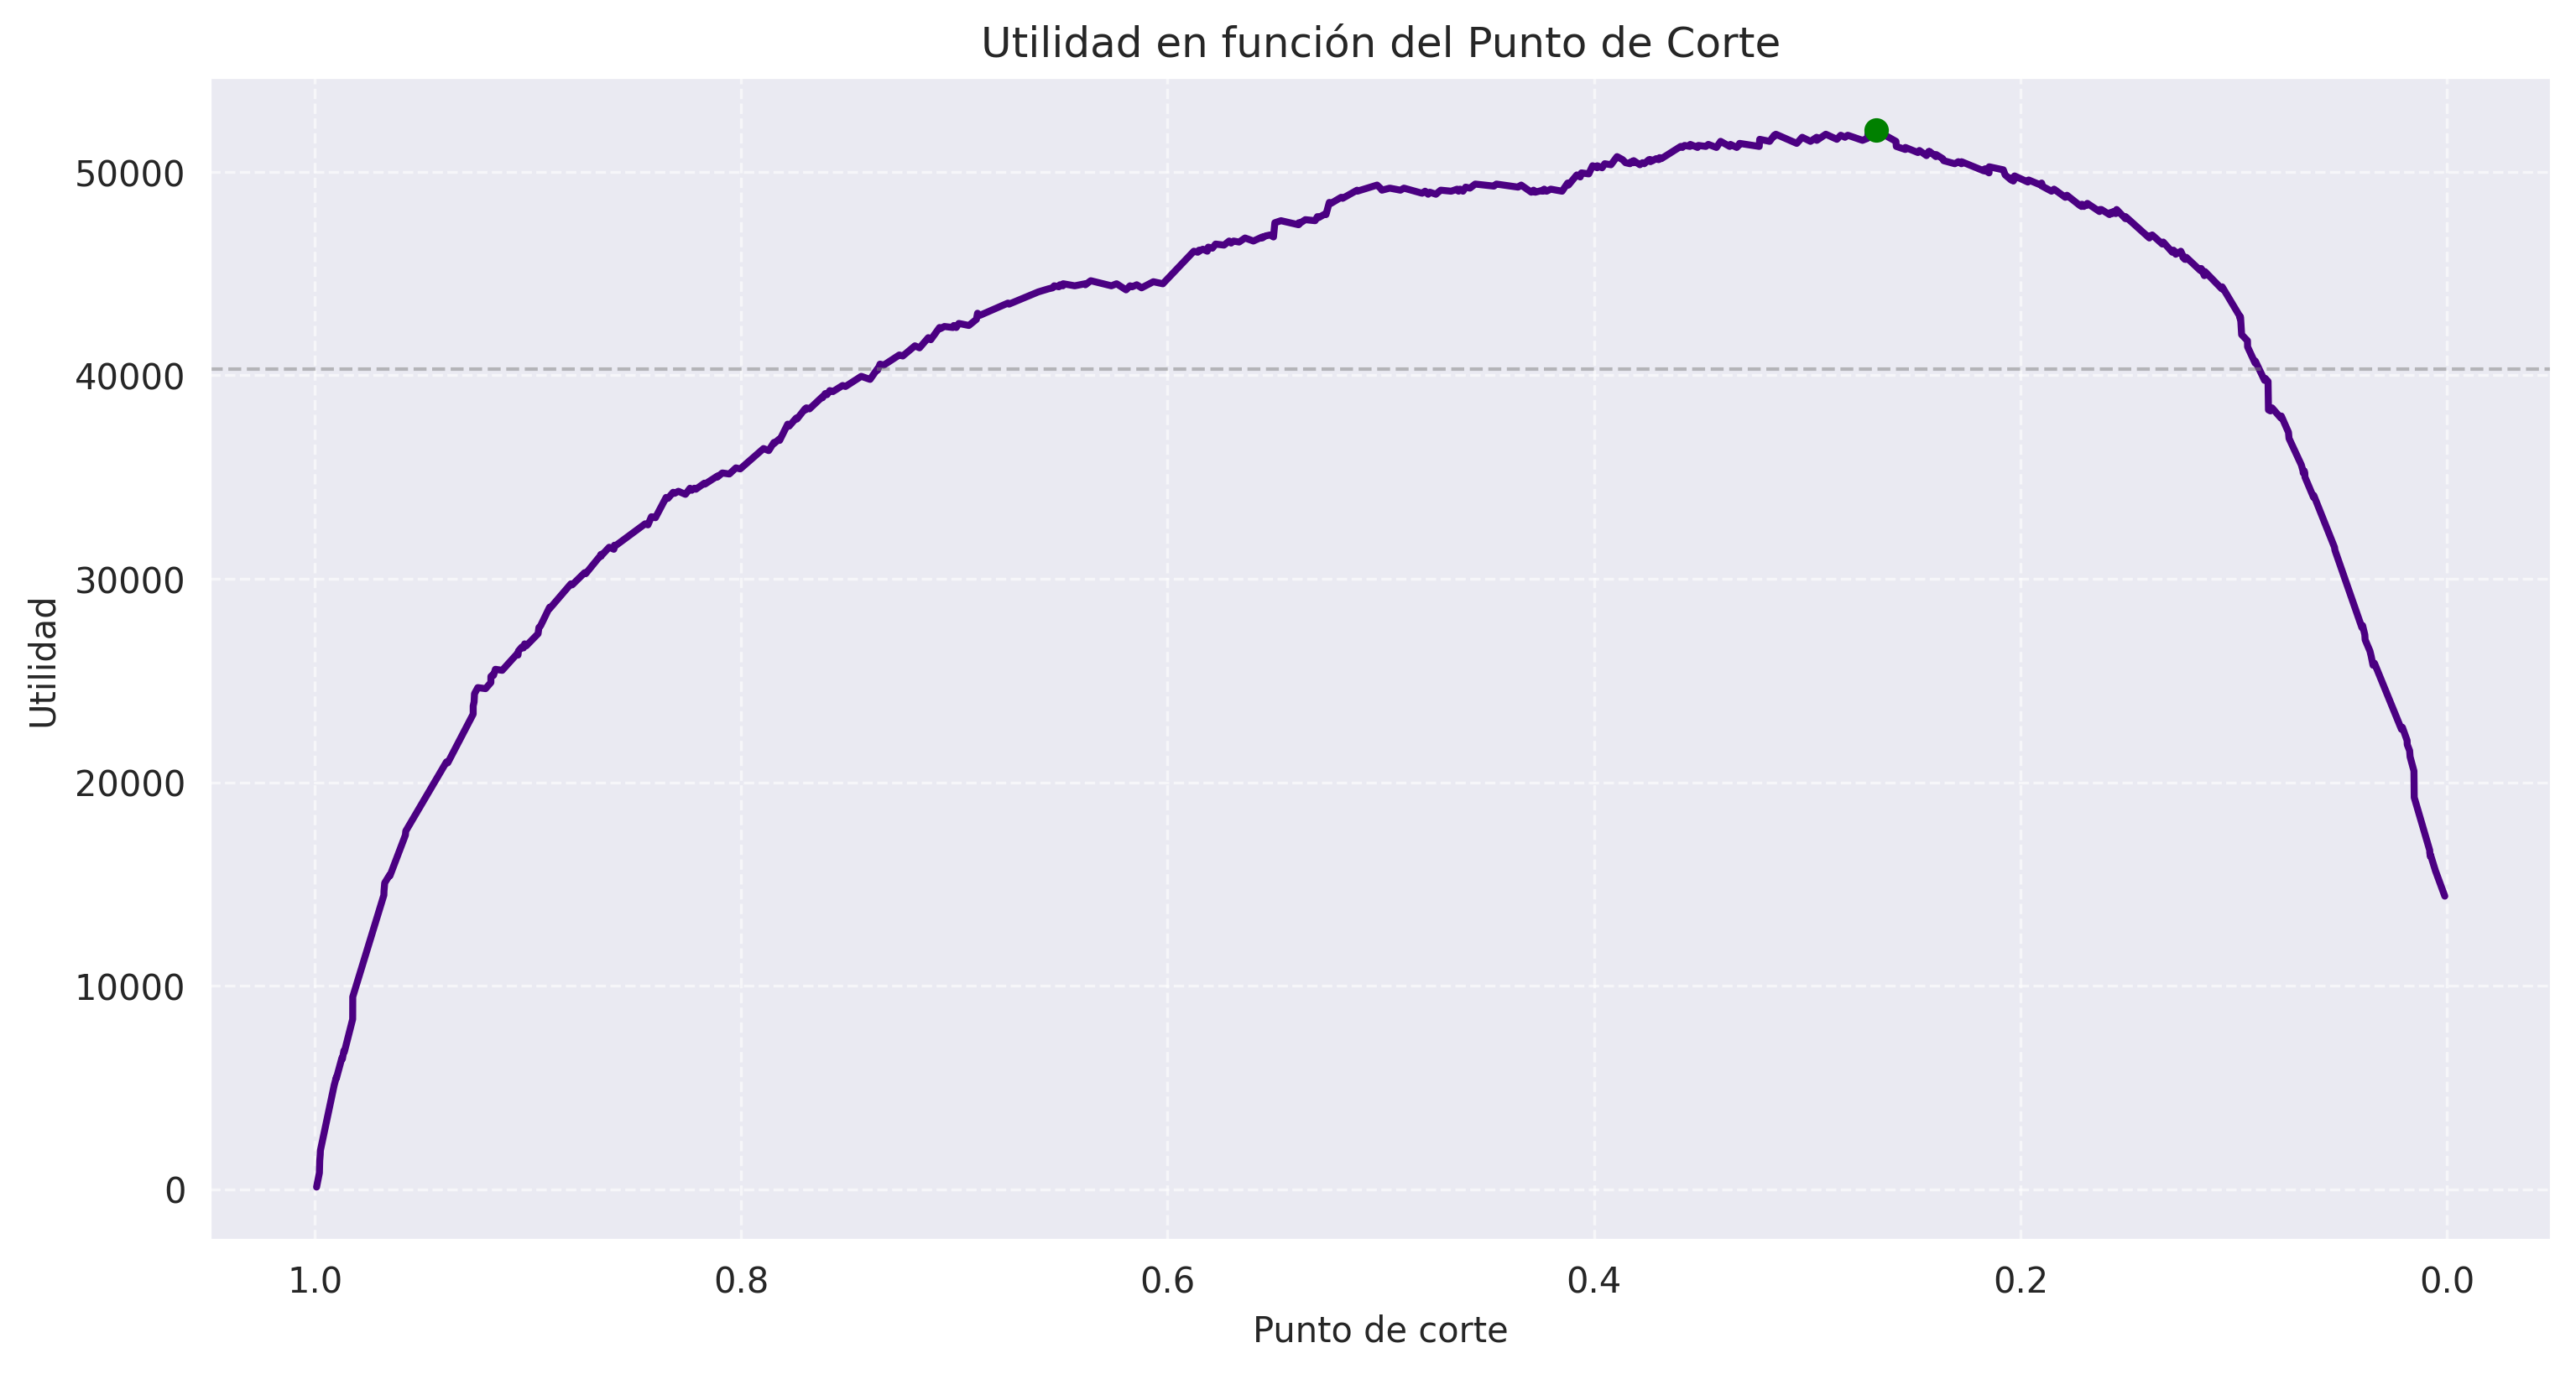

In [453]:
# Visualizaci√≥n de la utilidad en funci√≥n del punto de corte
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(puntos_de_corte, utilidades, color='#4B0082', linewidth=2)
plt.scatter(punto_de_corte_optimo, utilidad_maxima, color='green', zorder=4)
plt.axhline(y=np.mean(utilidades), color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Punto de corte')
plt.ylabel('Utilidad')
plt.title('Utilidad en funci√≥n del Punto de Corte')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_xaxis()
plt.legend([], [], frameon=False)

plt.show()



# Interpretacion
üìå Punto de corte √≥ptimo: 0.268
   - Si la probabilidad de conversi√≥n estimada es >= 0.268, clasificamos como "convertido" (1).
   - Si es menor, clasificamos como "no convertido" (0).

üí∞ Utilidad m√°xima alcanzada: 52,050
   - Este umbral maximiza la utilidad esperada, considerando beneficios y costos.
   - Elegir otro punto podr√≠a mejorar otras m√©tricas (precisi√≥n, recall) pero impactar√≠a la utilidad.

üìä Consideraciones:
   - Un umbral m√°s alto reducir√≠a falsos positivos (FP) pero tambi√©n verdaderos positivos (TP).
   - Un umbral m√°s bajo aumentar√≠a TP pero con m√°s FP y mayor costo.
   - La elecci√≥n del umbral depende del contexto del negocio y la tolerancia al riesgo.

# √ölitmos paso a realizar

In [454]:
# Evaluacion del modelo en datos prueba
punto_de_corte_optimo = 0.268
predicciones_finales = (Y_prediccion >= punto_de_corte_optimo).astype(int)
print(classification_report(Y_evaluacion, predicciones_finales))

              precision    recall  f1-score   support

       False       0.93      0.77      0.85      1136
        True       0.72      0.91      0.80       712

    accuracy                           0.83      1848
   macro avg       0.82      0.84      0.82      1848
weighted avg       0.85      0.83      0.83      1848



üìå Reporte de Clasificaci√≥n:

- Precisi√≥n (Precision):
  - Clase 'No': 93%  ‚Üí Cuando el modelo dice 'No', acierta el 93% de las veces.
  - Clase 'S√≠': 72%  ‚Üí Cuando el modelo dice 'S√≠', acierta el 72% de las veces.

- Sensibilidad / Recall:
  - Clase 'No': 77%  ‚Üí El modelo identifica correctamente el 77% de los 'No'.
  - Clase 'S√≠': 91%  ‚Üí El modelo identifica correctamente el 91% de los 'S√≠'.

- F1-score:
  - Clase 'No': 85%  ‚Üí Promedio entre precisi√≥n y recall.
  - Clase 'S√≠': 80%  ‚Üí Equilibrio entre la precisi√≥n y la recuperaci√≥n de la clase positiva.

üîπ Interpretaci√≥n:
El modelo detecta bien a los clientes que convertir√°n (recall 91%), pero
comete errores al predecir conversiones falsas (precisi√≥n del 72%).
Se puede mejorar equilibrando recall y precisi√≥n con ajustes en el umbral de decisi√≥n.

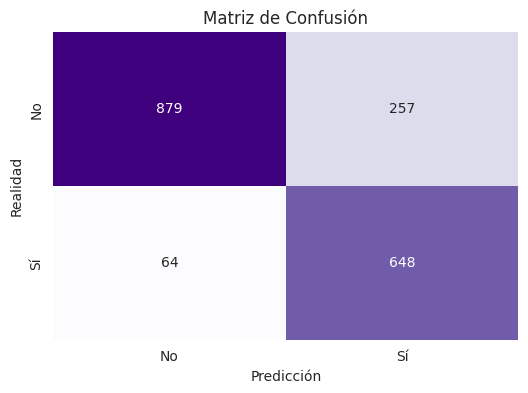

In [455]:
# Calculamos la matriz de confusi√≥n
matriz_confusion = confusion_matrix(Y_evaluacion, predicciones_finales)
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Purples", cbar=False, xticklabels=['No', 'S√≠'], yticklabels=['No', 'S√≠'])
plt.xlabel("Predicci√≥n")
plt.ylabel("Realidad")
plt.title("Matriz de Confusi√≥n")
plt.show()

# Interpretacion de la gr√°fica
- Verdaderos negativos (No - No): 879 casos correctamente clasificados.
- Falsos positivos (No - S√≠): 257 casos mal clasificados como conversi√≥n.
- Falsos negativos (S√≠ - No): 64 casos de conversi√≥n mal clasificados como 'No'.
- Verdaderos positivos (S√≠ - S√≠): 648 casos correctamente clasificados como conversi√≥n.

üîπ Interpretaci√≥n:
El modelo tiene un buen desempe√±o identificando conversiones,
pero a√∫n genera falsos positivos y negativos. Esto indica que podr√≠a mejorarse
ajustando el umbral de decisi√≥n o probando con otro modelo.

In [456]:
# Extraemos coeficientes del modelo entrenado
coeficientes = modelo_rl.coef_[0]
variables = X_entrenamiento.columns
df_coeficientes = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coeficientes,
    'Odds Ratio': np.exp(coeficientes)
}).sort_values(by='Odds Ratio', ascending=False)

print(df_coeficientes)

                                              Variable  Coeficiente  \
3                          Total Time Spent on Website     4.477161   
39                        Lead Source_Welingak Website     1.890080   
46                    Last Activity_Approached upfront     1.200478   
144           Lead Profile_Dual Specialization Student     1.157786   
21                           Lead Origin_Lead Add Form     1.100025   
..                                                 ...          ...   
137         What is your current occupation_Unemployed    -1.320983   
140  What matters most to you in choosing a course_...    -1.457052   
20                 Lead Origin_Landing Page Submission    -1.568372   
56               Last Activity_Olark Chat Conversation    -1.649888   
148                 Lead Profile_Student of SomeSchool    -2.949730   

     Odds Ratio  
3     87.984492  
39     6.619896  
46     3.321705  
144    3.182879  
21     3.004240  
..          ...  
137    0.266873  
140

üìå Coeficientes de la Regresi√≥n Log√≠stica:

üîπ Variables que aumentan la probabilidad de conversi√≥n:
- 'Total Time Spent on Website' ‚Üí Coef: 4.477 ‚Üí M√°s tiempo en la web, m√°s probabilidad de conversi√≥n.
- 'Lead Source_Welingak Website' ‚Üí Coef: 1.889 ‚Üí Leads de esta fuente convierten m√°s.
- 'Last Activity_Approached upfront' ‚Üí Coef: 1.200 ‚Üí Contacto directo aumenta conversi√≥n.

üîπ Variables que reducen la probabilidad de conversi√≥n:
- 'Lead Profile_Student of SomeSchool' ‚Üí Coef: -2.949 ‚Üí Estudiantes de ciertas escuelas convierten menos.
- 'Last Activity_Olark Chat Conversation' ‚Üí Coef: -1.650 ‚Üí Menos probabilidad de conversi√≥n por chat.

üîπ Interpretaci√≥n:
Los coeficientes indican qu√© tan fuerte es el impacto de cada variable en la conversi√≥n.
Valores positivos incrementan la conversi√≥n y valores negativos la reducen.

In [457]:
# Ahora veremos la  proporci√≥n de clases
proporcion_clases = np.bincount(Y_evaluacion) / len(Y_evaluacion)
print(f"Proporci√≥n de clases: {proporcion_clases}")

Proporci√≥n de clases: [0.61471861 0.38528139]


- Clientes que NO convierten: 61.47%
- Clientes que S√ç convierten: 38.52%

üîπ Interpretaci√≥n:
Existe un ligero desbalance en las clases, con m√°s clientes que no convierten.
Esto puede afectar el rendimiento del modelo, ya que puede tender a favorecer la clase mayoritaria.

In [458]:
# Ahora hallaremos la Utilidad Esperada
punto_corte_optimo = 0.268
utilidad_maxima = 52050
proporcion_clases = np.array([0.6147, 0.3853])
utilidad_esperada = utilidad_maxima * np.dot(proporcion_clases, [1, 1])
print(f"üìå Utilidad esperada: {utilidad_esperada:.2f}")

üìå Utilidad esperada: 52050.00


# üìå Conclusiones finales del an√°lisis de Regresi√≥n Log√≠stica üìä
1Ô∏è‚É£ **Precisi√≥n general del modelo**: Logramos una precisi√≥n del 83%, indicando un buen desempe√±o en la clasificaci√≥n.  
2Ô∏è‚É£ **Balance entre clases**: La proporci√≥n de clases es de aproximadamente 61.47% (No convertidos) y 38.53% (Convertidos).  
3Ô∏è‚É£ **Matriz de confusi√≥n**:  
   - Se lograron **879 verdaderos negativos** y **648 verdaderos positivos**.  
   - Existen **257 falsos positivos** y **64 falsos negativos**, lo que implica que el modelo a√∫n tiene margen de mejora.  
4Ô∏è‚É£ **M√©tricas clave**:  
   - **Precisi√≥n para 'S√≠' (clase positiva)**: 72%  
   - **Recall para 'S√≠'**: 91% (buena capacidad de capturar casos positivos).  
   - **F1-Score**: Balance de 80%, lo que muestra un modelo robusto.  
5Ô∏è‚É£ **Factores m√°s influyentes**:  
   - üîº **Mayor impacto positivo**:  
     - **Tiempo total en el sitio web** (Odds Ratio: 87.98)  
     - **Fuente de lead: Welingak Website** (Odds Ratio: 6.61)  
   - üîΩ **Mayor impacto negativo**:  
     - **Perfil de lead: Estudiante de alguna escuela** (Odds Ratio: 0.05)  
     - **Actividad: Chat Olark** (Odds Ratio: 0.19)  
6Ô∏è‚É£ **Punto de corte √≥ptimo**: 0.268, maximizando la utilidad.  
7Ô∏è‚É£ **Utilidad esperada**: üí∞ 52,050.00, lo que indica que el modelo es rentable en t√©rminos de clasificaci√≥n.  

üìå **Reflexi√≥n final**:  
El modelo de regresi√≥n log√≠stica ha demostrado ser una herramienta √∫til para predecir conversiones con una combinaci√≥n equilibrada de precisi√≥n y recall. Sin embargo, hay oportunidades de mejora, como la optimizaci√≥n del umbral de clasificaci√≥n y la exploraci√≥n de modelos m√°s avanzados (como Random Forest o XGBoost).  